In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from spectral_cube import SpectralCube
from glob import glob
from astropy import units as u
from astropy.visualization import simple_norm
from astropy.table import Table

In [3]:
Table.read('/blue/adamginsburg/savannahgramze/ACES_EVF/aces_evf/dubious_sources.csv')

<Table length=31>
ID_Number Number    l       b     V_LSR   deltal  deltab  deltaV min_v max_v
  int64   int64  float64 float64 float64 float64 float64 float64 int64 int64
--------- ------ ------- ------- ------- ------- ------- ------- ----- -----
        0      1  -0.282   0.055   -37.0   0.027   0.027    47.0   -60   -13
        1      2  -0.261   0.024   -96.0   0.033   0.033    61.0  -126   -65
        2      3  -0.307    0.03   -33.0   0.025   0.025    35.0   -50   -15
        3      4  -0.462  -0.256  -118.0    0.02   0.025    45.0  -140   -95
        5      6  -0.401  -0.131     7.0   0.045  0.0304    43.0   -13    30
        9     10  -0.436  -0.159   -65.0    0.02    0.02    30.0   -80   -50
       10     11  -0.323  -0.112   -41.6    0.02    0.02    40.0   -70   -30
       16     20  -0.318  -0.012   -43.0    0.05    0.05    60.0   -70   -10
       17     21  -0.273  -0.053   -60.0    0.03    0.03    40.0   -80   -40
      ...    ...     ...     ...     ...     ...     ...     ...   ...   ...
       42     21 -0.0151 -0.0666    38.6  0.0057  0.0065    24.7    30    54
       43     22  -0.026   0.009   -31.2  0.0047   0.004    22.3   -45   -22
       55     39  -0.289  0.0471   -38.6  0.0076  0.0108    19.3   -48   -28
       58     42 -0.0511  0.0587    28.2  0.0075   0.007    15.6    25    41
       78      3  -0.048  -0.062    50.5  0.0081  0.0063    17.9    39    57
       79      4 -0.0615  -0.028    22.3  0.0161  0.0069    39.0     6    45
       82      7 -0.0822 -0.0456     4.5  0.0137   0.008    27.5    -8    19
       85     10  -0.133 -0.0882    13.4  0.0119  0.0102    41.6     3    45
       86     11  -0.178  0.0324    65.3  0.0366   0.031    17.8    49    67
       88     13  -0.302 -0.0624     5.9  0.0168  0.0183    22.3    -5    17

In [2]:
basepath = '/orange/adamginsburg/ACES/broadline_sources/EVFs/'
cubepath = f'{basepath}/cubes/CS21/'
spectrapath = f'{basepath}/spectra/'
pvdiagrampath = f'{basepath}/pvdiagrams/'

# Exemplars

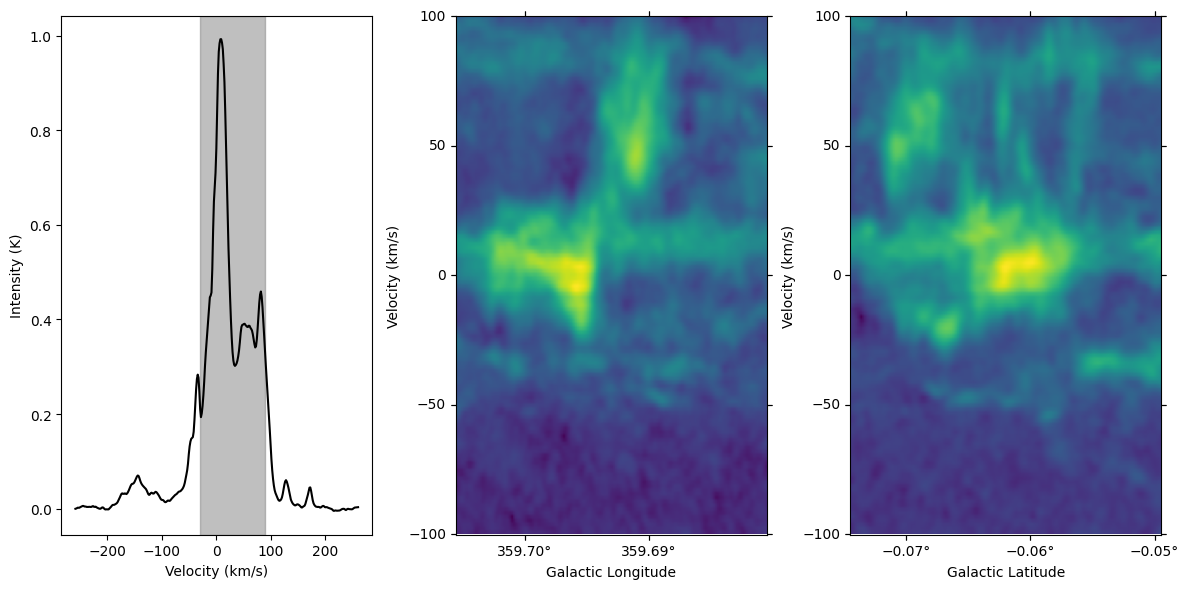

In [3]:
fn = glob(f'{cubepath}/*_14_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-30, 90, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.coords[0].set_major_formatter('d.dd')
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.coords[0].set_major_formatter('d.dd')
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

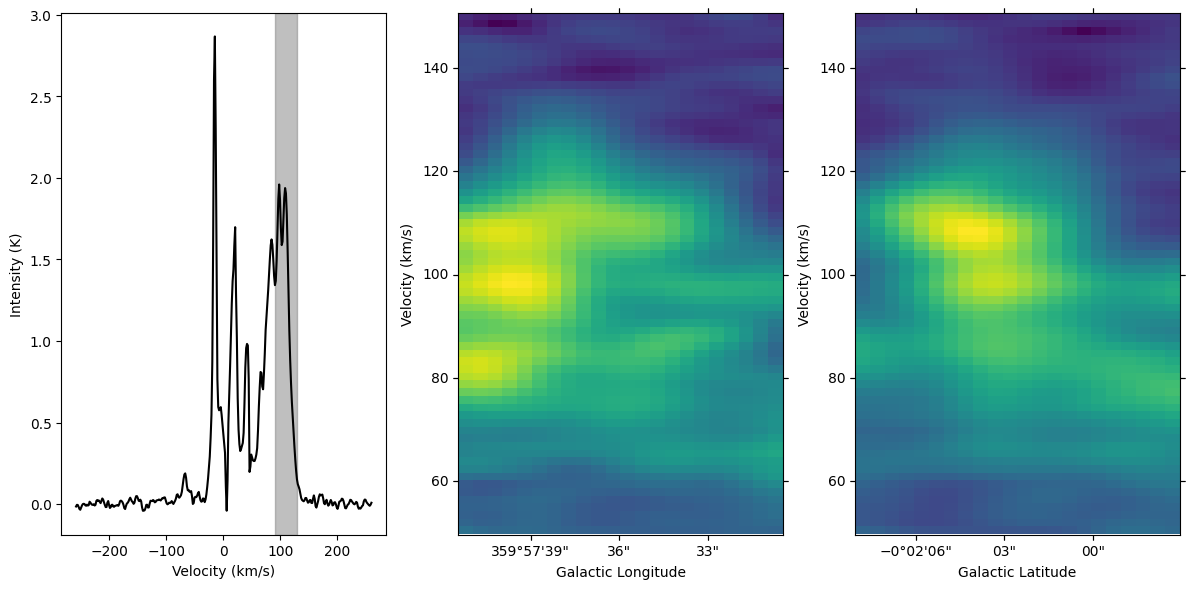

In [29]:
fn = glob(f'{cubepath}/*_53_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(50*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(50*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(90, 130, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

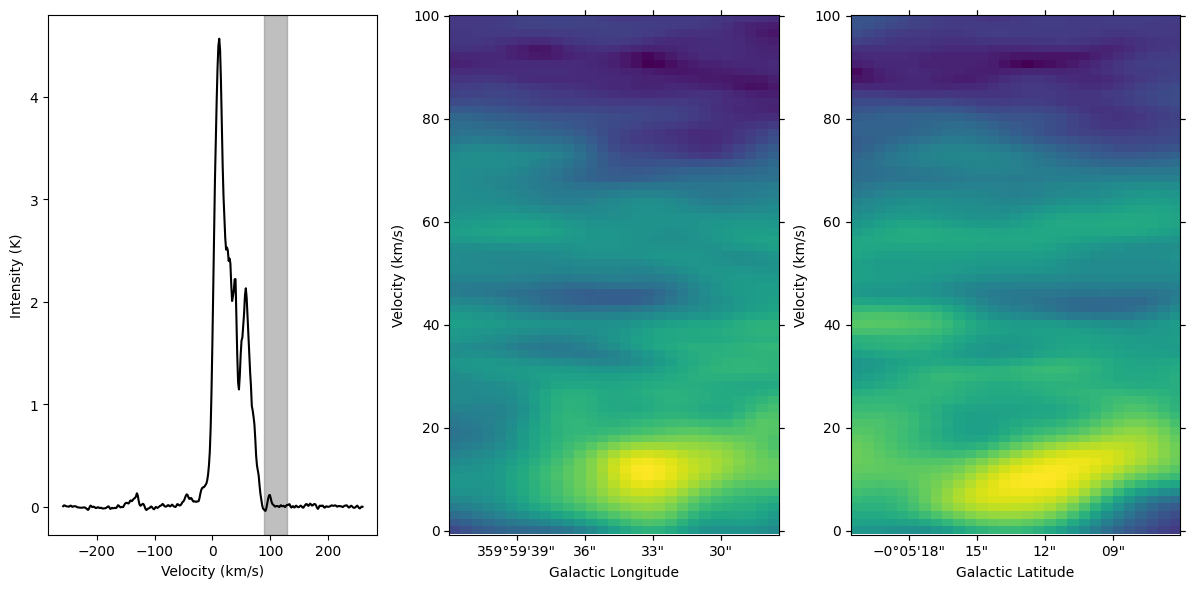

In [31]:
fn = glob(f'{cubepath}/*_84_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=2)
mom0 = cube.spectral_slab(-0*u.km/u.s, 40*u.km/u.s).moment0(axis=0)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(90, 130, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

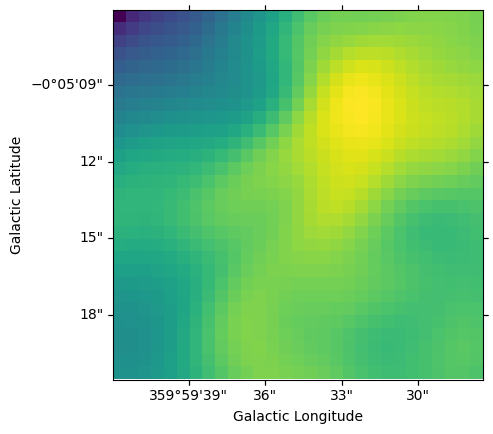

In [33]:
ax = plt.subplot(111, projection=mom0.wcs)
plt.imshow(mom0.data, origin='lower', cmap='viridis', norm=simple_norm(mom0.value, 'sqrt'))
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

# My Section of EVFs

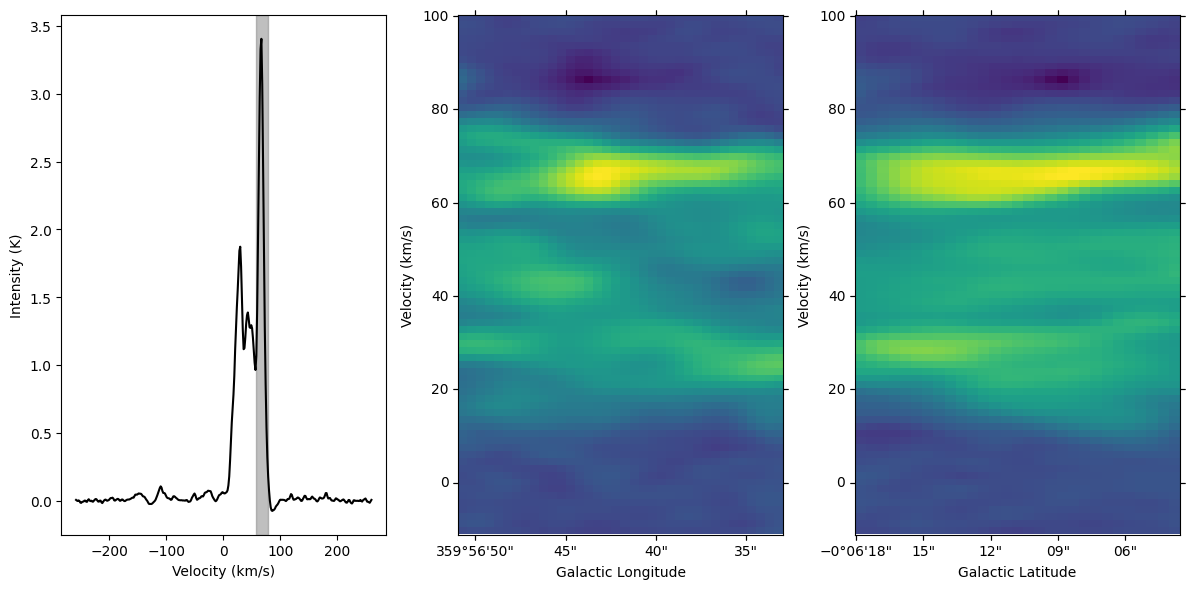

In [154]:
fn = glob(f'{cubepath}/*_31_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(57, 78, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

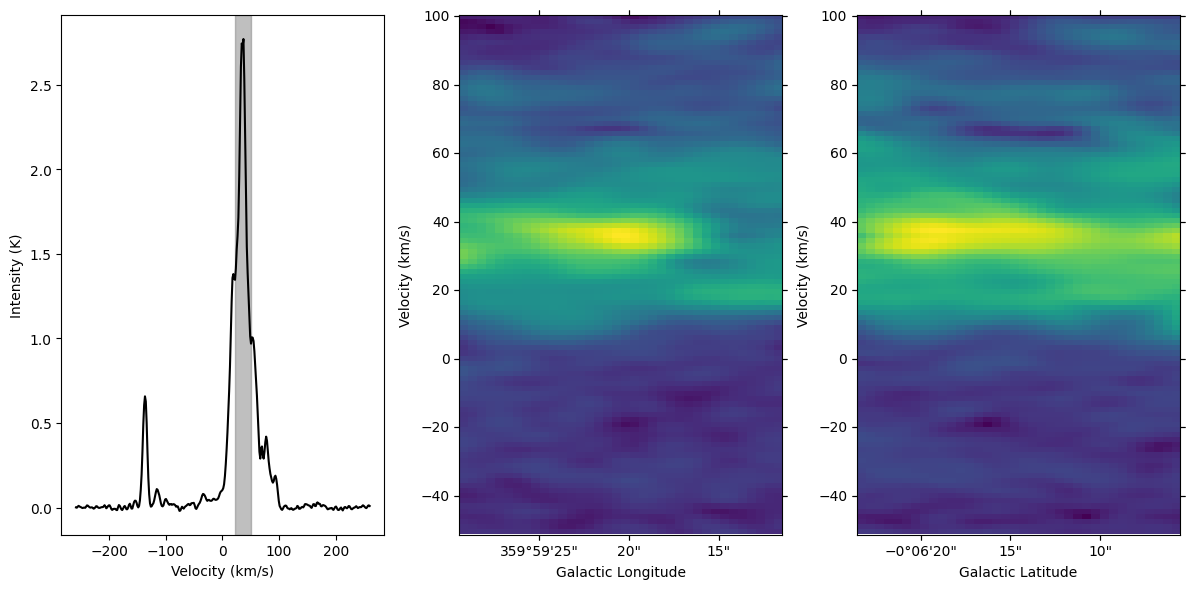

In [155]:
fn = glob(f'{cubepath}/*_32_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(22, 50, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

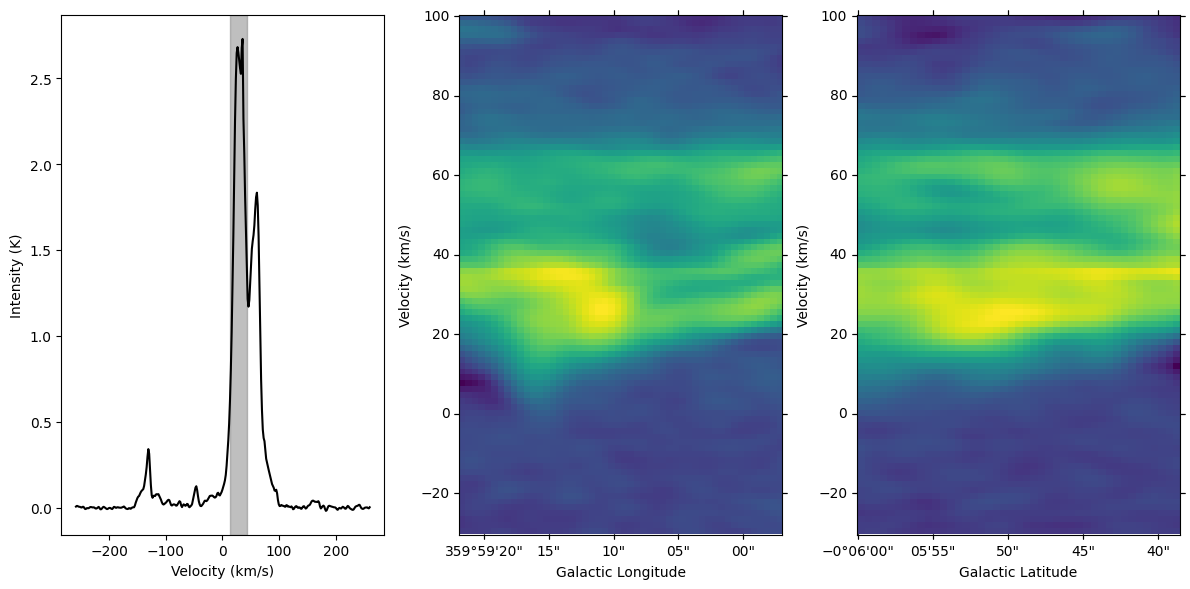

In [156]:
fn = glob(f'{cubepath}/*_33_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-30*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-30*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(13, 44, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

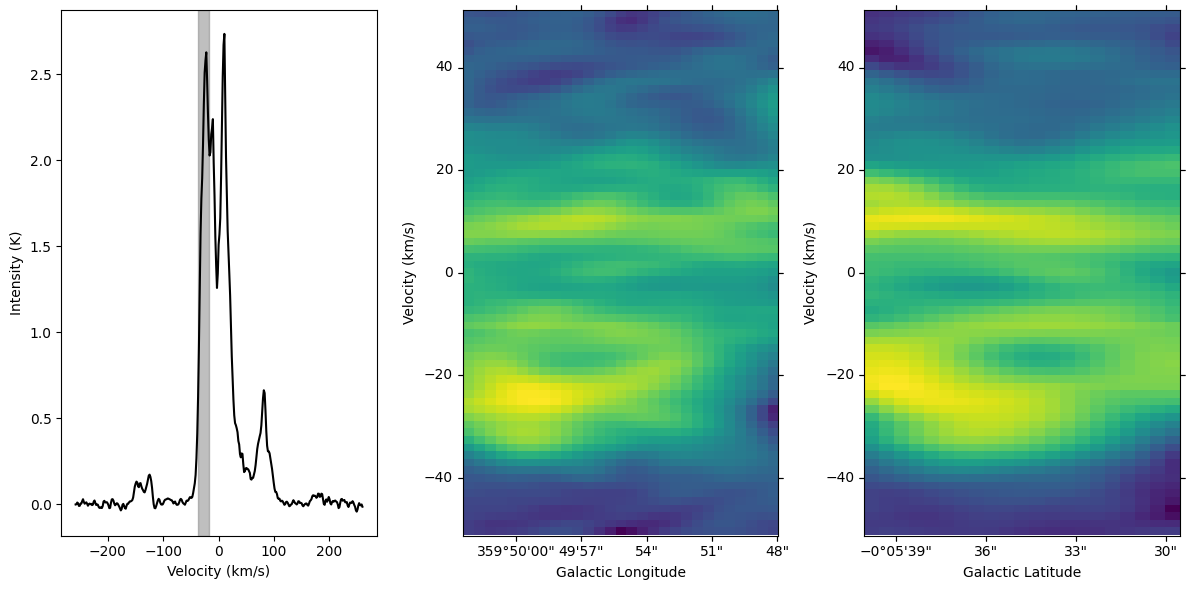

In [157]:
fn = glob(f'{cubepath}/*_34_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, 50*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, 50*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-38, -17, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

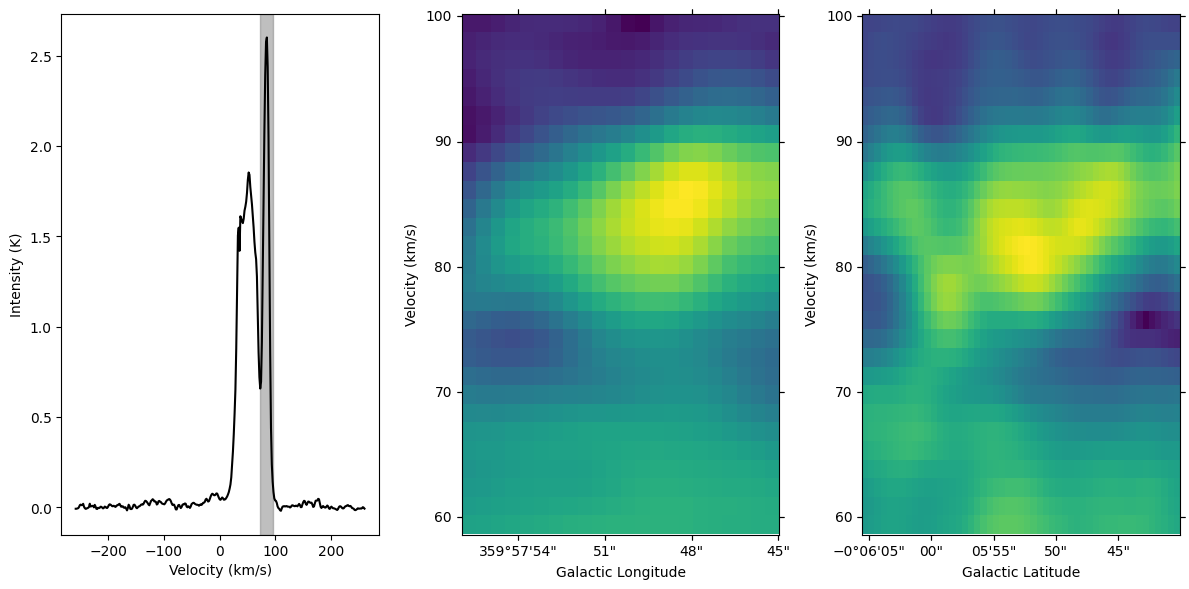

In [205]:
fn = glob(f'{cubepath}/*_35_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(60*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(60*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(72, 96, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

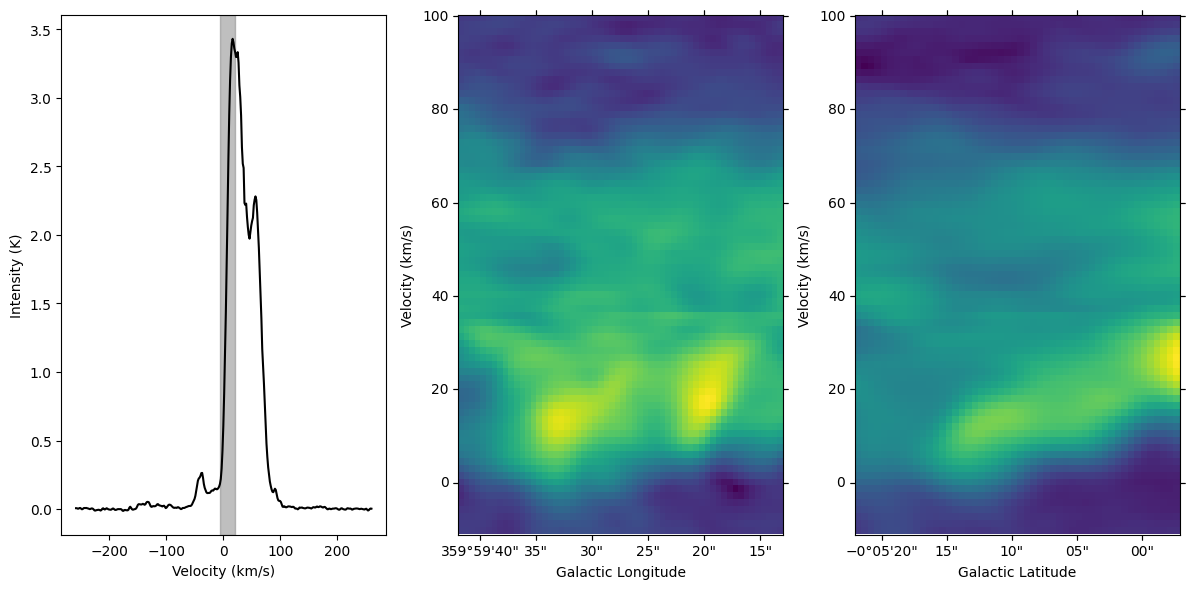

In [159]:
fn = glob(f'{cubepath}/*_36_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-5, 20, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

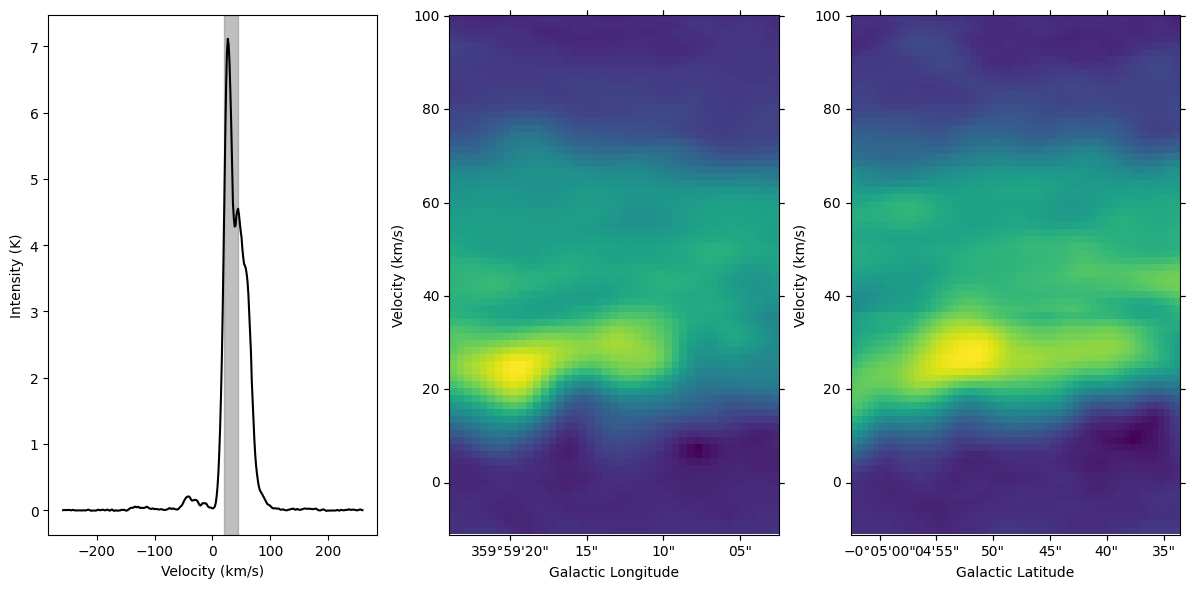

In [160]:
fn = glob(f'{cubepath}/*_37_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-10*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(20, 44, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

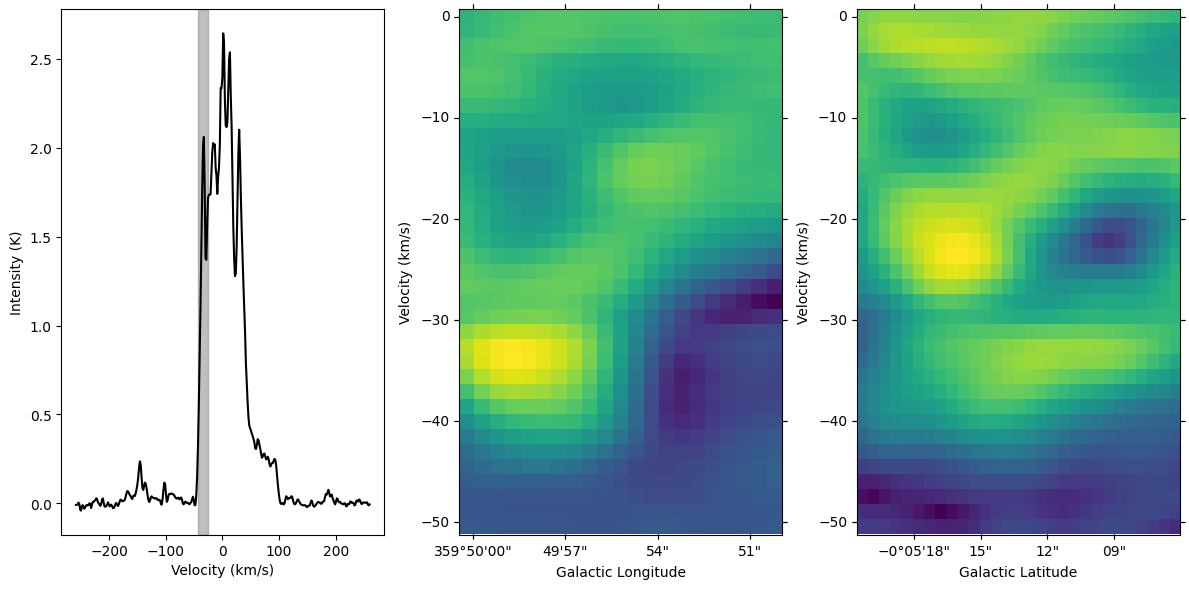

In [206]:
fn = glob(f'{cubepath}/*_38_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, 0*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, 0*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-43, -25, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

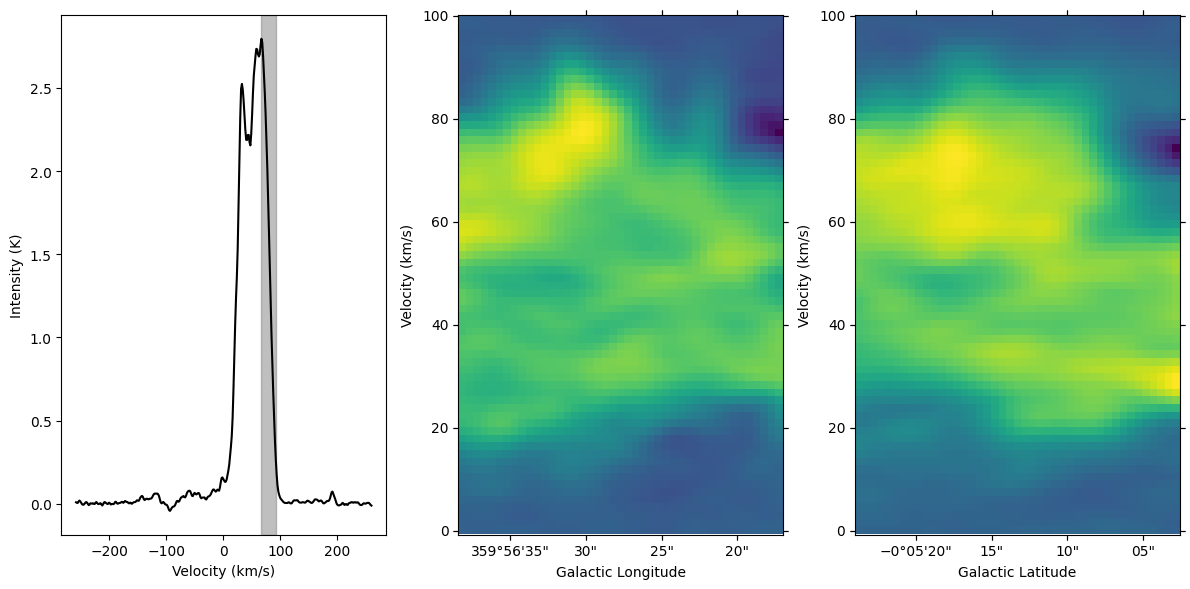

In [162]:
fn = glob(f'{cubepath}/*_39_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(66, 93, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

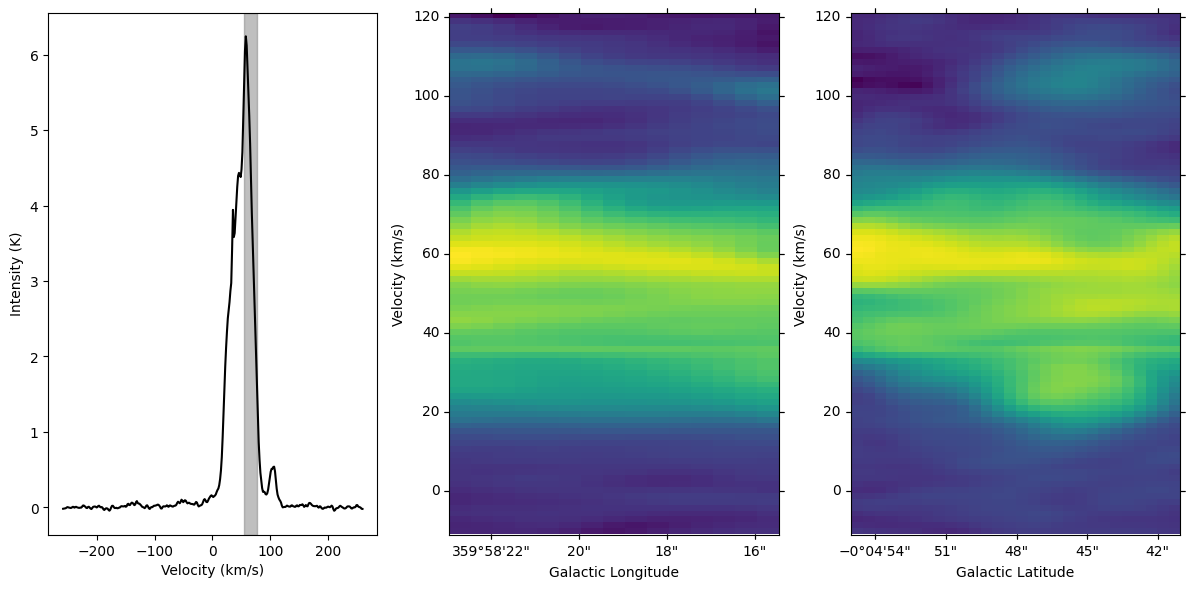

In [163]:
fn = glob(f'{cubepath}/*_40_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-10*u.km/u.s, 120*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-10*u.km/u.s, 120*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(54, 77, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

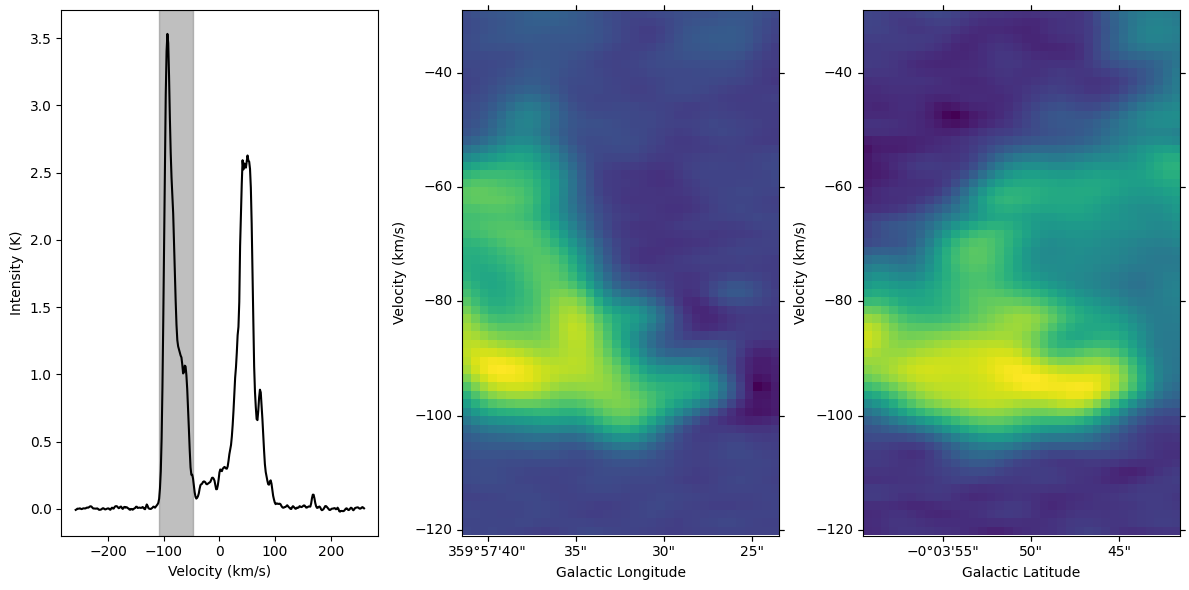

In [167]:
fn = glob(f'{cubepath}/*_41_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-120*u.km/u.s, -30*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-120*u.km/u.s, -30*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-108, -48, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

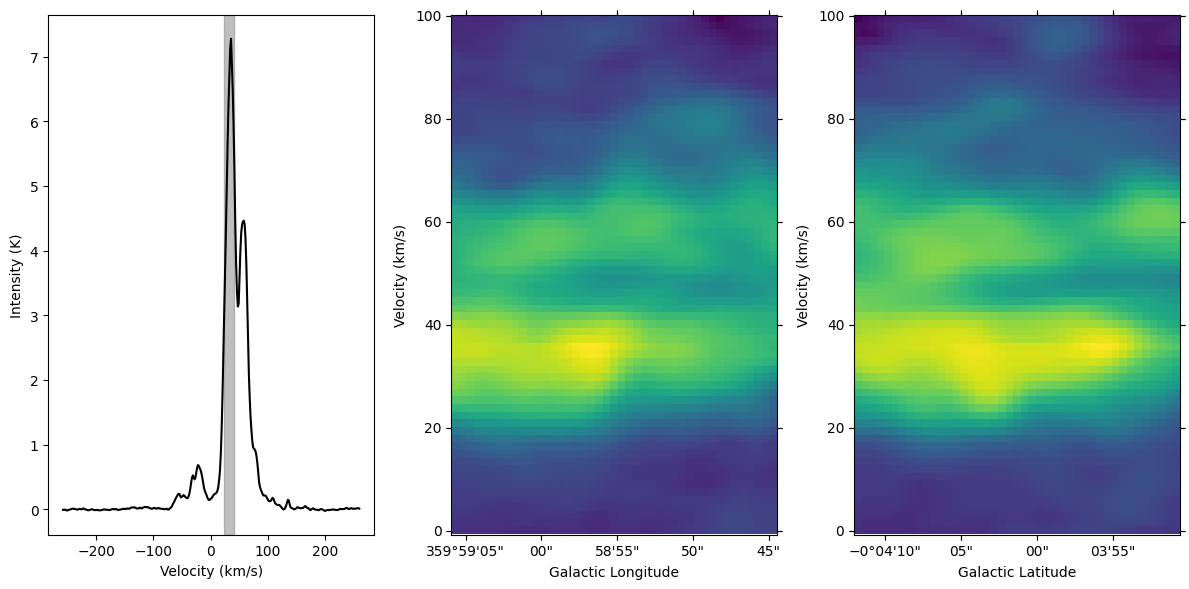

In [168]:
fn = glob(f'{cubepath}/*_42_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(23, 41, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

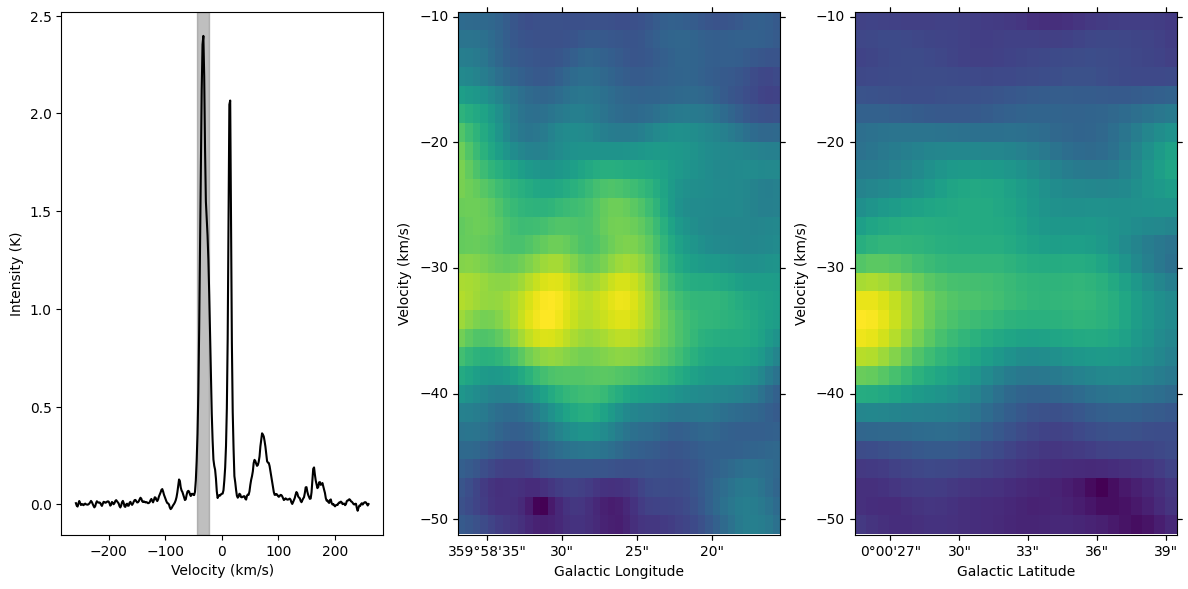

In [171]:
fn = glob(f'{cubepath}/*_43_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, -10*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, -10*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-44, -22, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

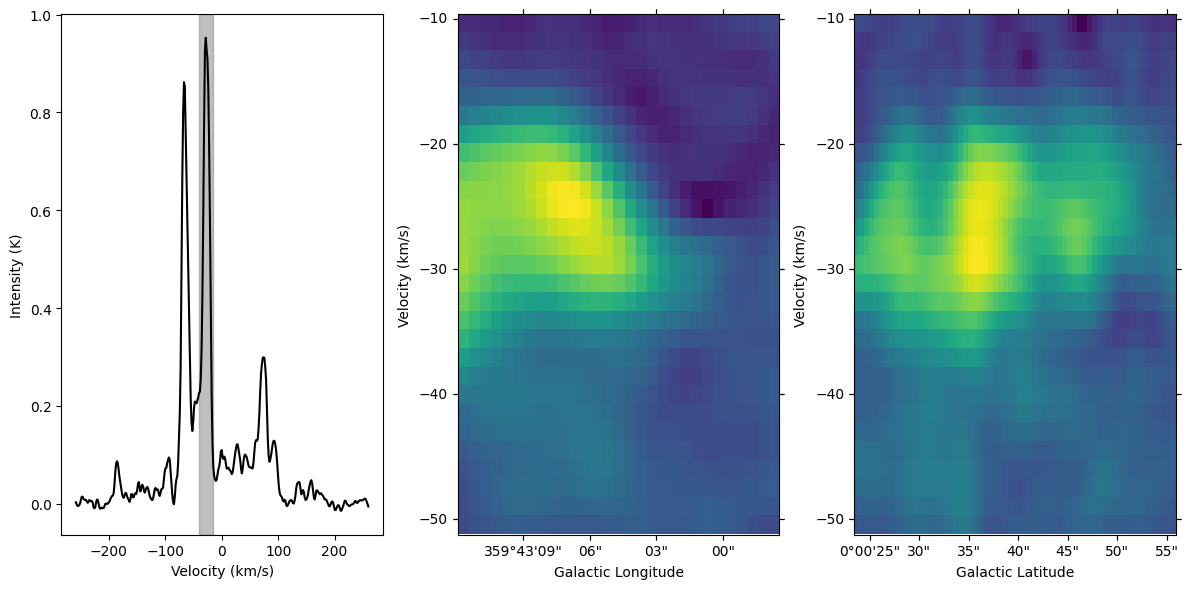

In [173]:
fn = glob(f'{cubepath}/*_44_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, -10*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, -10*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-41, -16, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

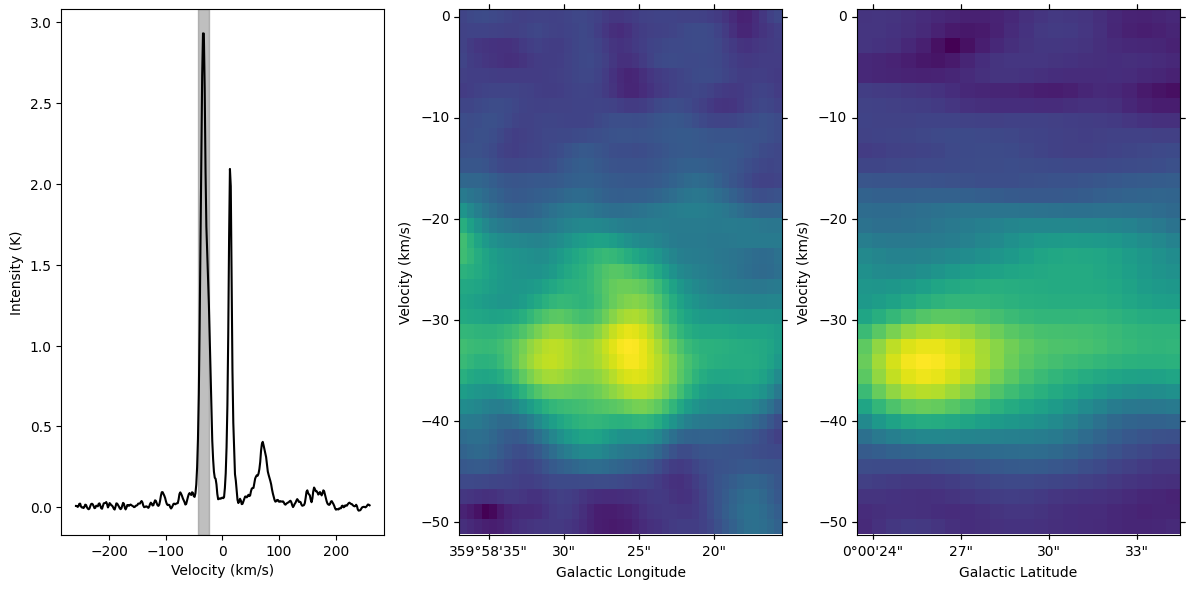

In [175]:
fn = glob(f'{cubepath}/*_45_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, 0*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, 0*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-43, -23, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

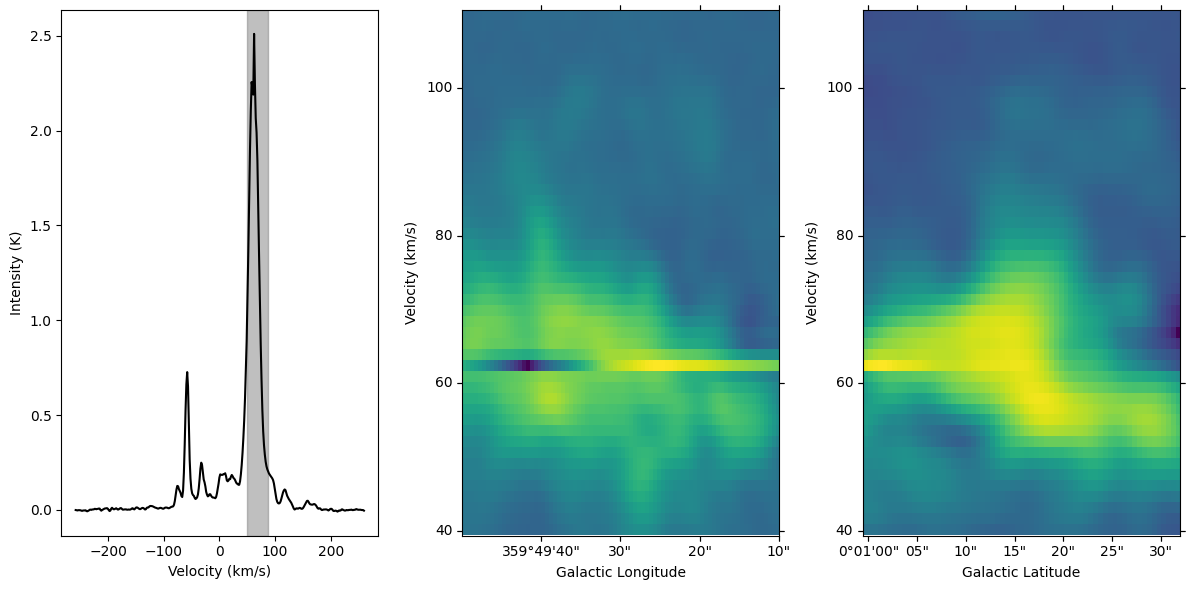

In [177]:
fn = glob(f'{cubepath}/*_46_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(40*u.km/u.s, 110*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(40*u.km/u.s, 110*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(50, 87, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

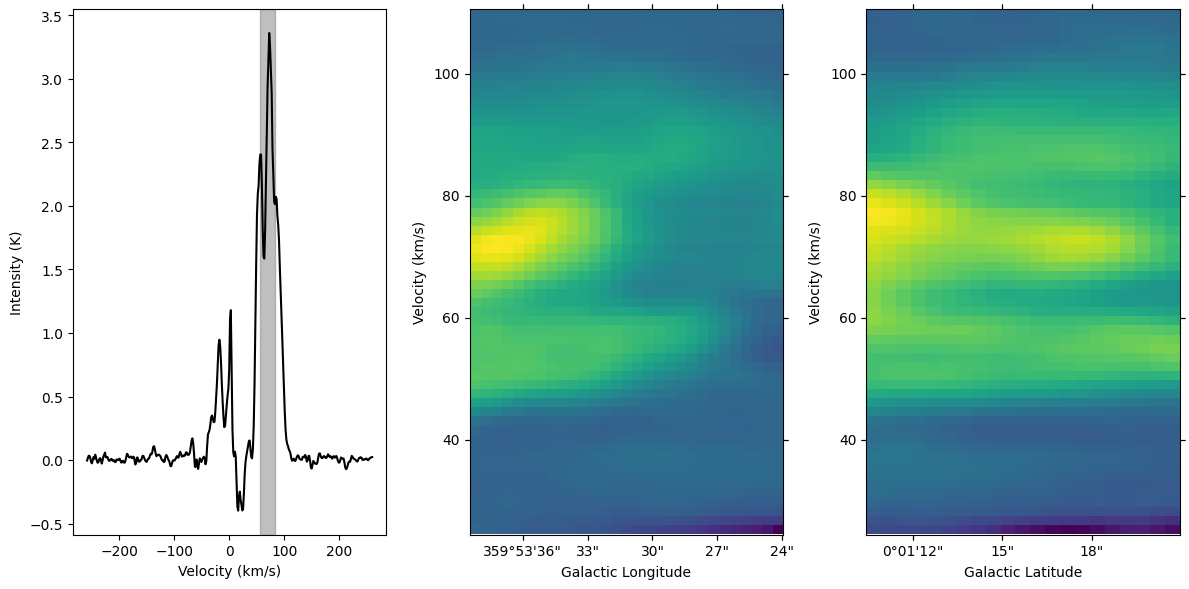

In [178]:
fn = glob(f'{cubepath}/*_47_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(25*u.km/u.s, 110*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(25*u.km/u.s, 110*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(56, 83, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

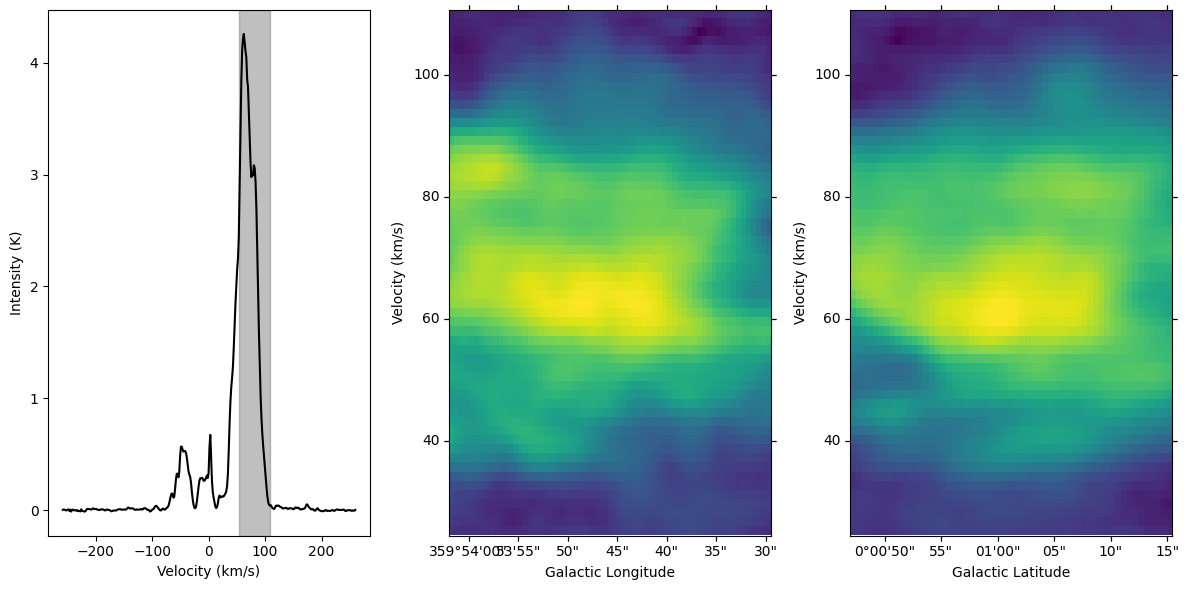

In [179]:
fn = glob(f'{cubepath}/*_48_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(25*u.km/u.s, 110*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(25*u.km/u.s, 110*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(53, 108, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

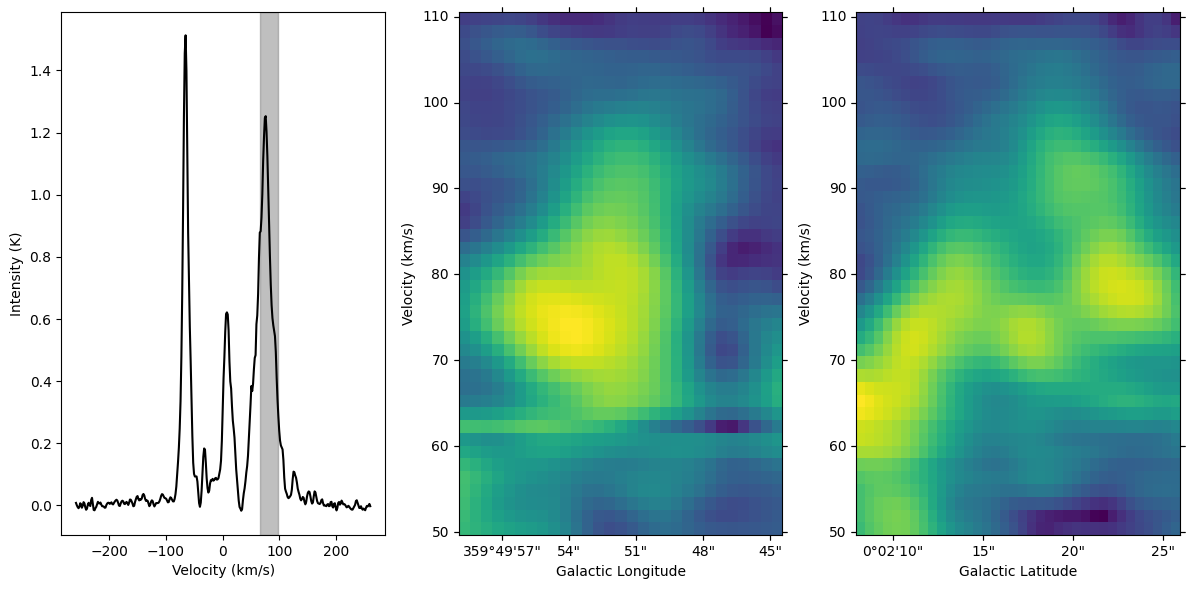

In [180]:
fn = glob(f'{cubepath}/*_49_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(50*u.km/u.s, 110*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(50*u.km/u.s, 110*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(66, 97, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

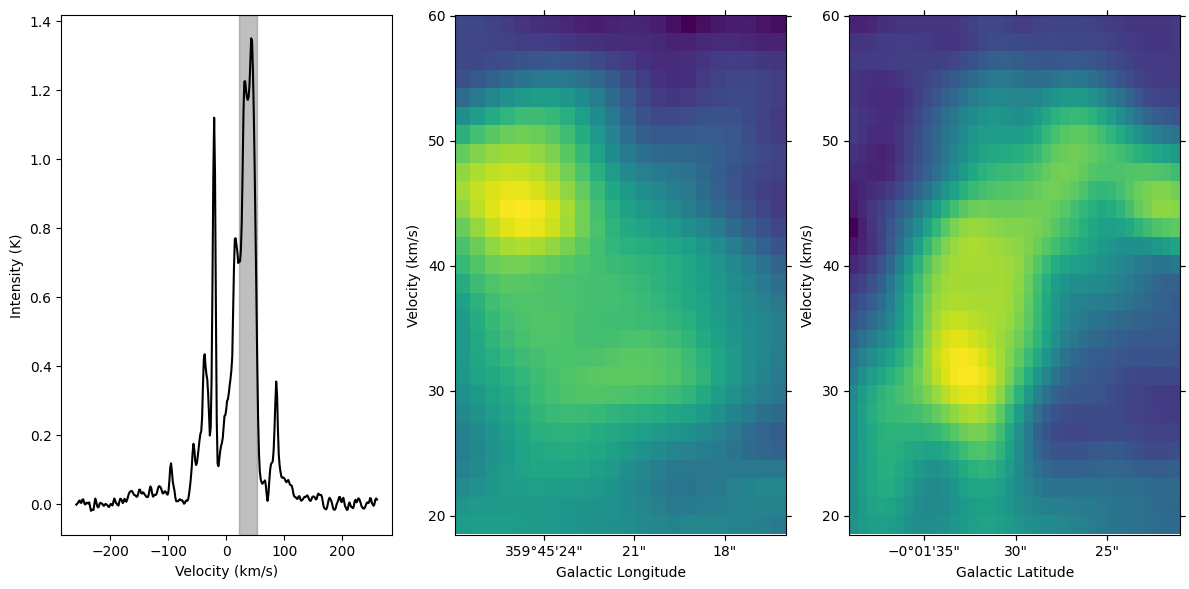

In [182]:
fn = glob(f'{cubepath}/*_50_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(20*u.km/u.s, 60*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(20*u.km/u.s, 60*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(22, 53, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

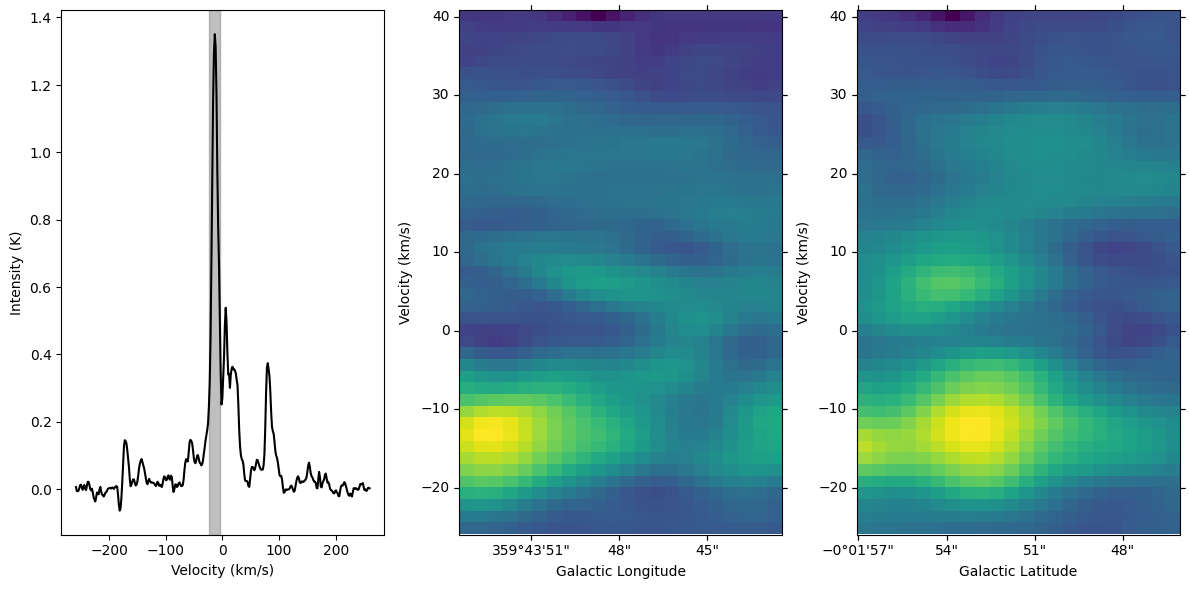

In [184]:
fn = glob(f'{cubepath}/*_51_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-25*u.km/u.s, 40*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-25*u.km/u.s, 40*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-23, -4, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

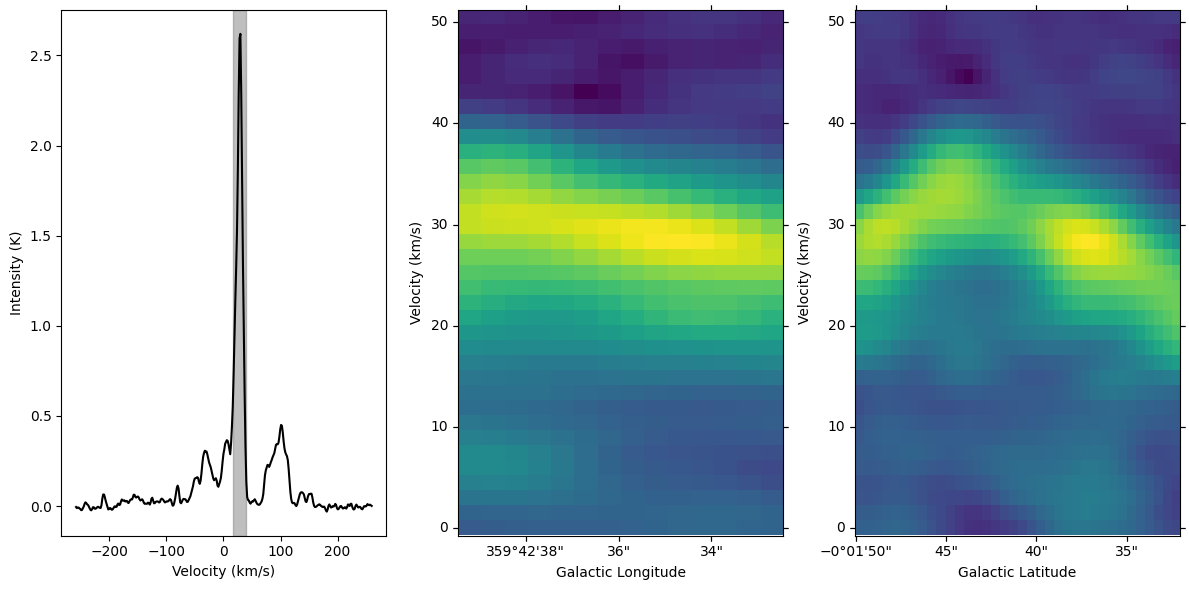

In [185]:
fn = glob(f'{cubepath}/*_52_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 50*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 50*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(17, 40, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

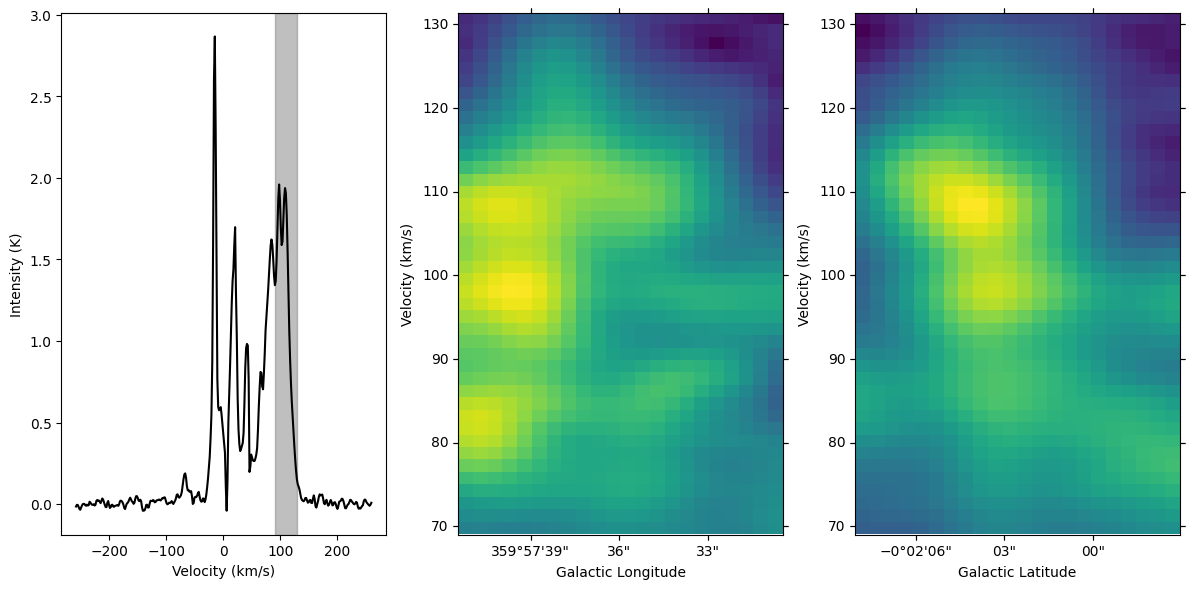

In [188]:
fn = glob(f'{cubepath}/*_53_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(70*u.km/u.s, 130*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(70*u.km/u.s, 130*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(90, 130, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

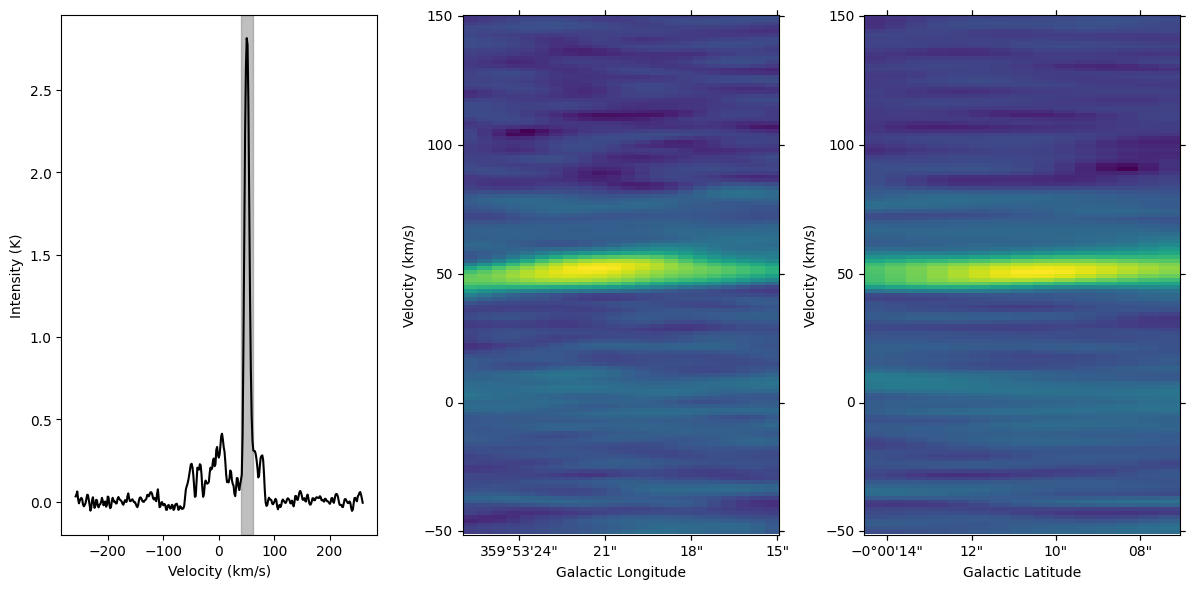

In [189]:
fn = glob(f'{cubepath}/*_54_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-50*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-50*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(41, 62, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

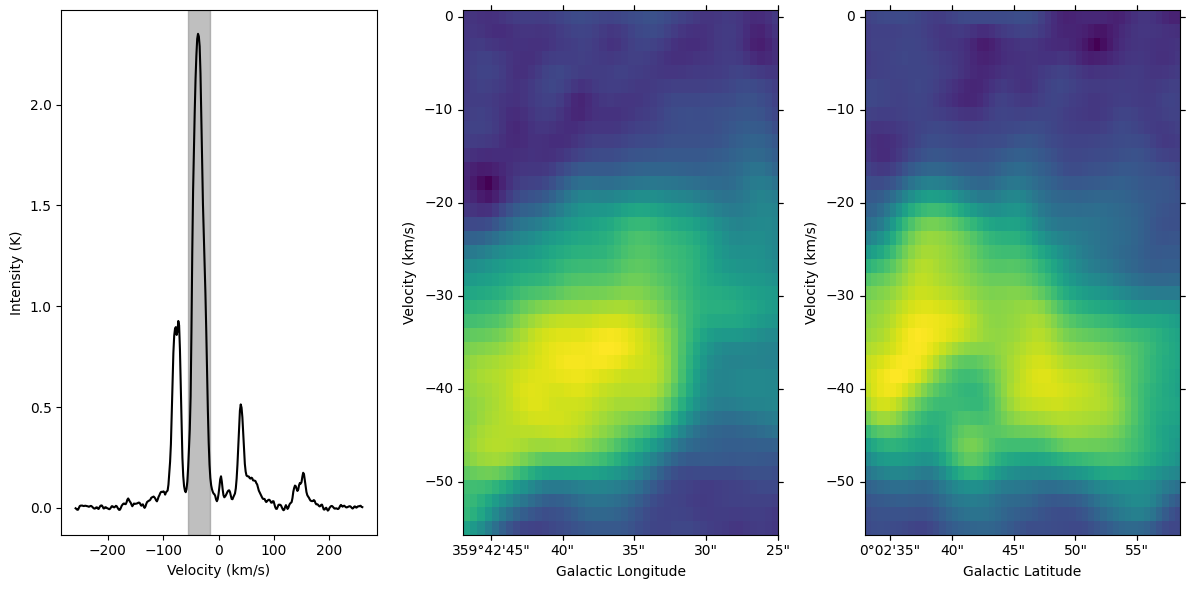

In [209]:
fn = glob(f'{cubepath}/*_55_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-55*u.km/u.s, 0*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-55*u.km/u.s, 0*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-56, -16, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

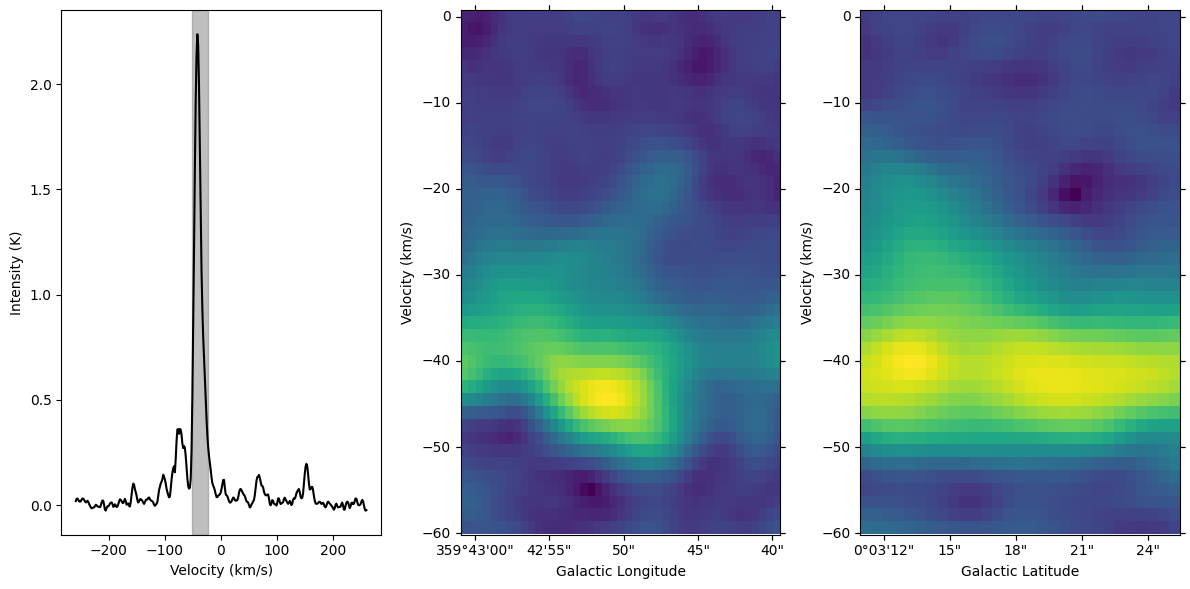

In [192]:
fn = glob(f'{cubepath}/*_56_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-60*u.km/u.s, 0*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-60*u.km/u.s, 0*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-51, -22, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

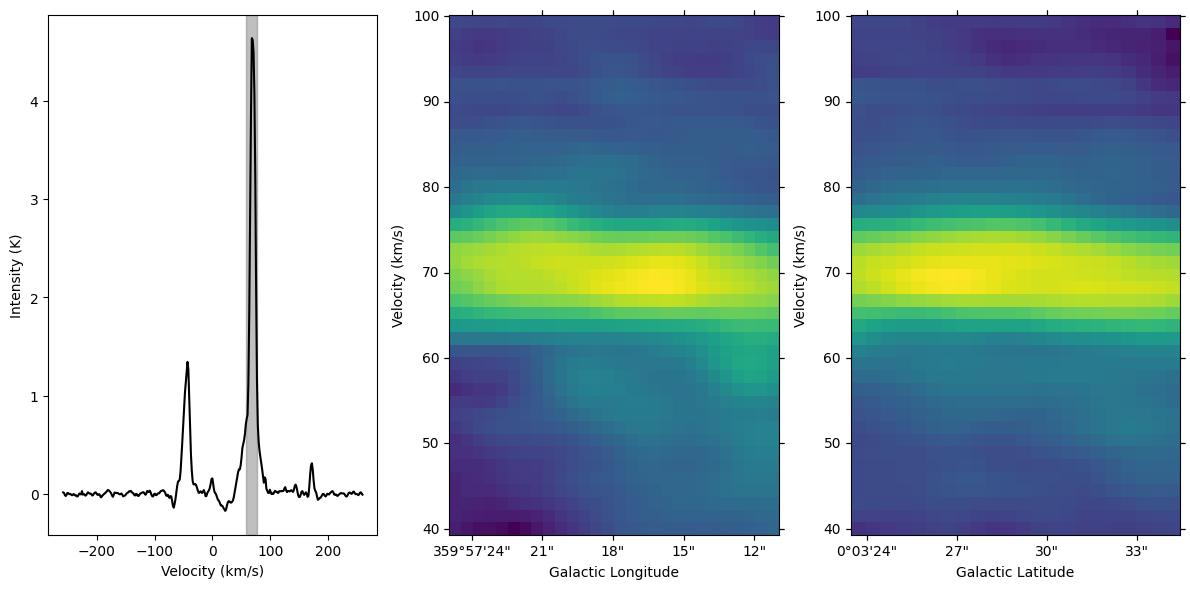

In [196]:
fn = glob(f'{cubepath}/*_57_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(40*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(40*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(59, 78, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

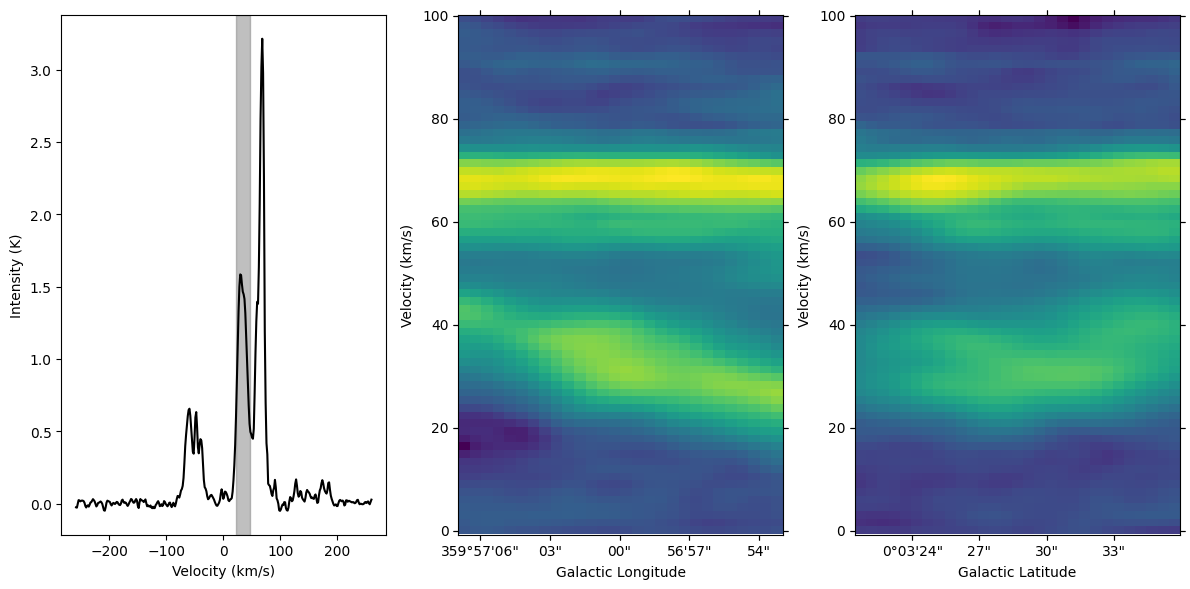

In [207]:
fn = glob(f'{cubepath}/*_58_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(23, 46, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

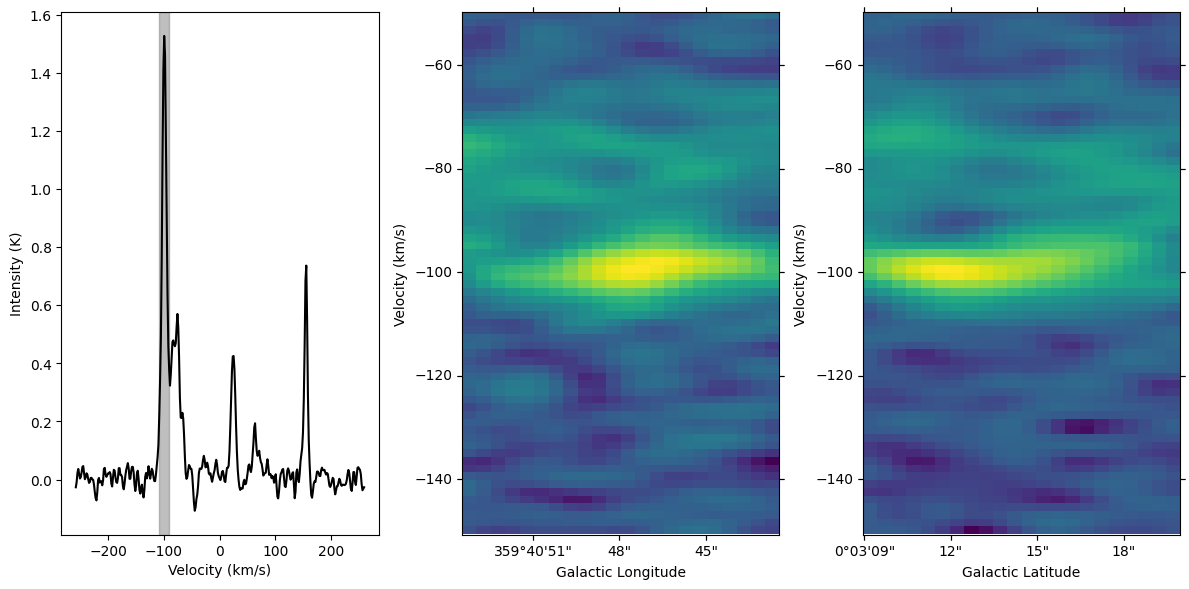

In [199]:
fn = glob(f'{cubepath}/*_59_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-150*u.km/u.s, -50*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-150*u.km/u.s, -50*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-109, -90, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

/red/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


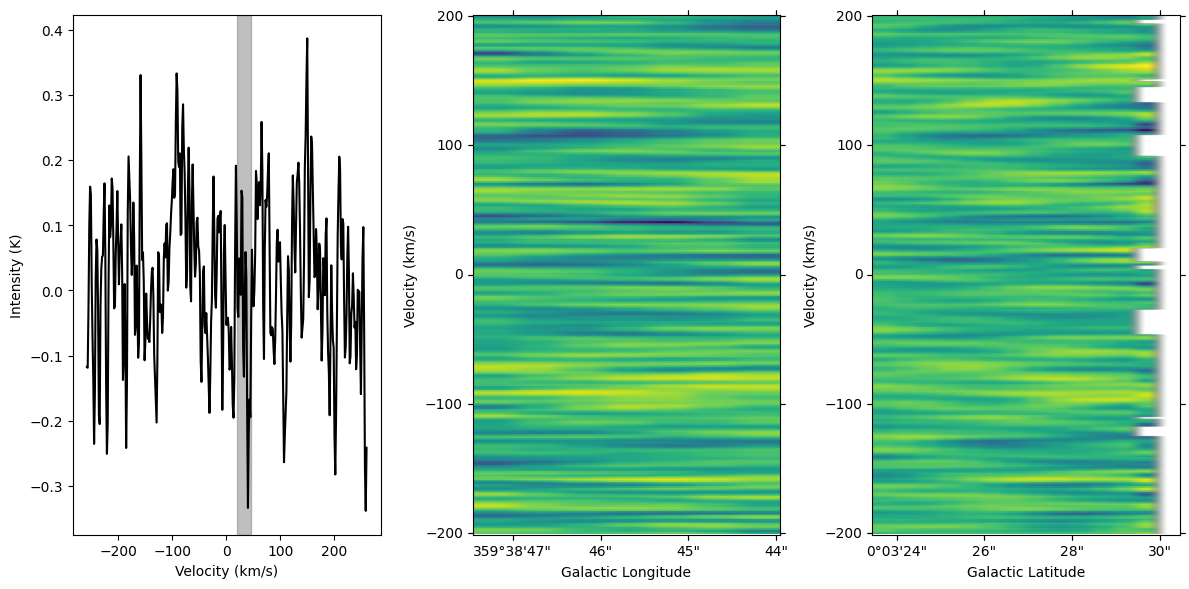

In [200]:
fn = glob(f'{cubepath}/*_60_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-200*u.km/u.s, 200*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-200*u.km/u.s, 200*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(20, 46, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

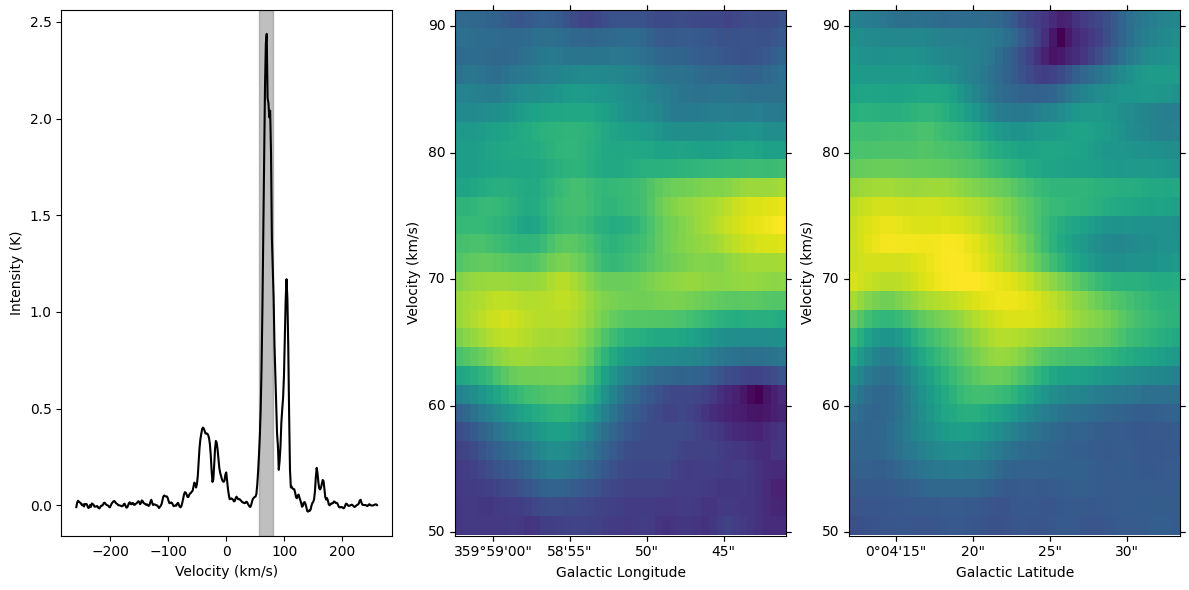

In [202]:
fn = glob(f'{cubepath}/*_61_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(50*u.km/u.s, 90*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(50*u.km/u.s, 90*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(56, 81, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

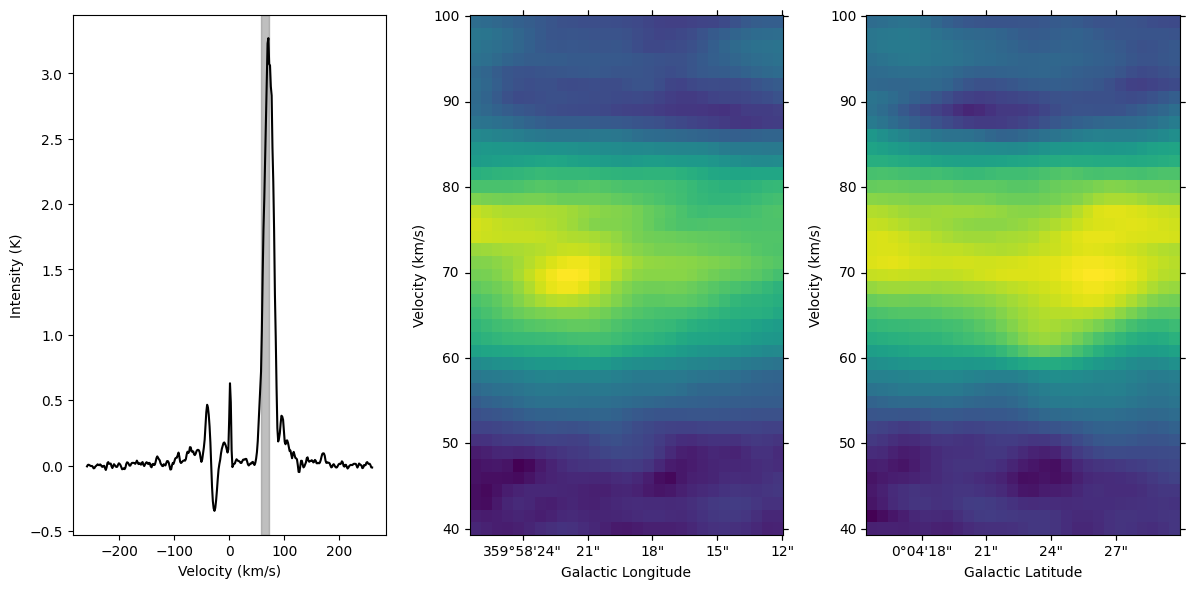

In [204]:
fn = glob(f'{cubepath}/*_62_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(40*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(40*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(57, 72, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

# Checking Group's EVFs

## Natalie's

/red/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


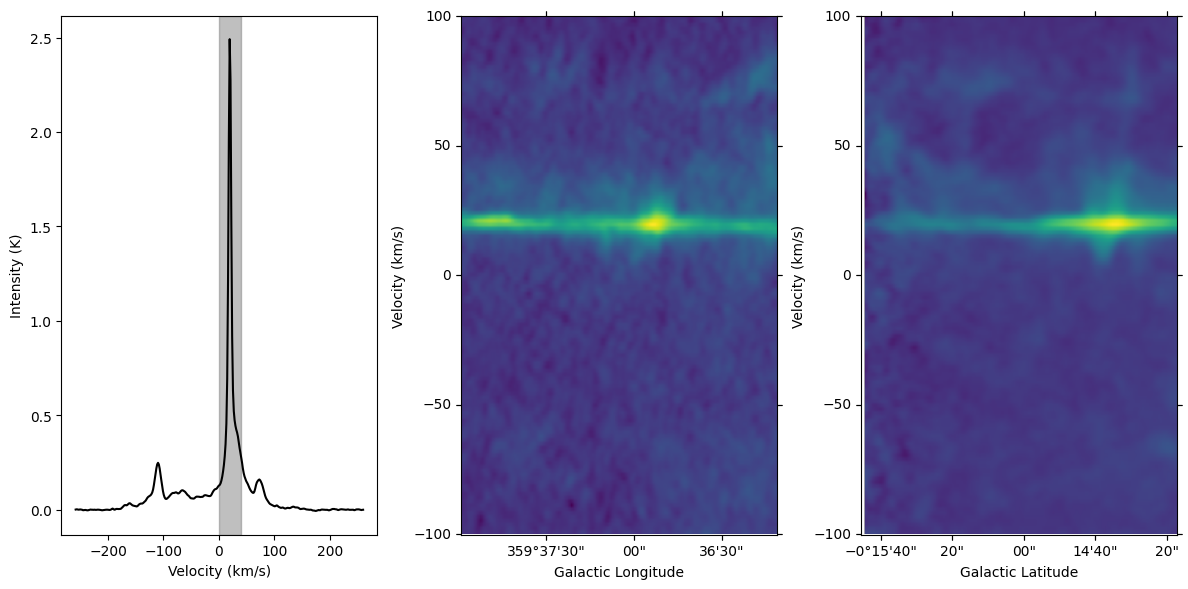

In [4]:
fn = glob(f'{cubepath}/*_4_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(0, 40, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

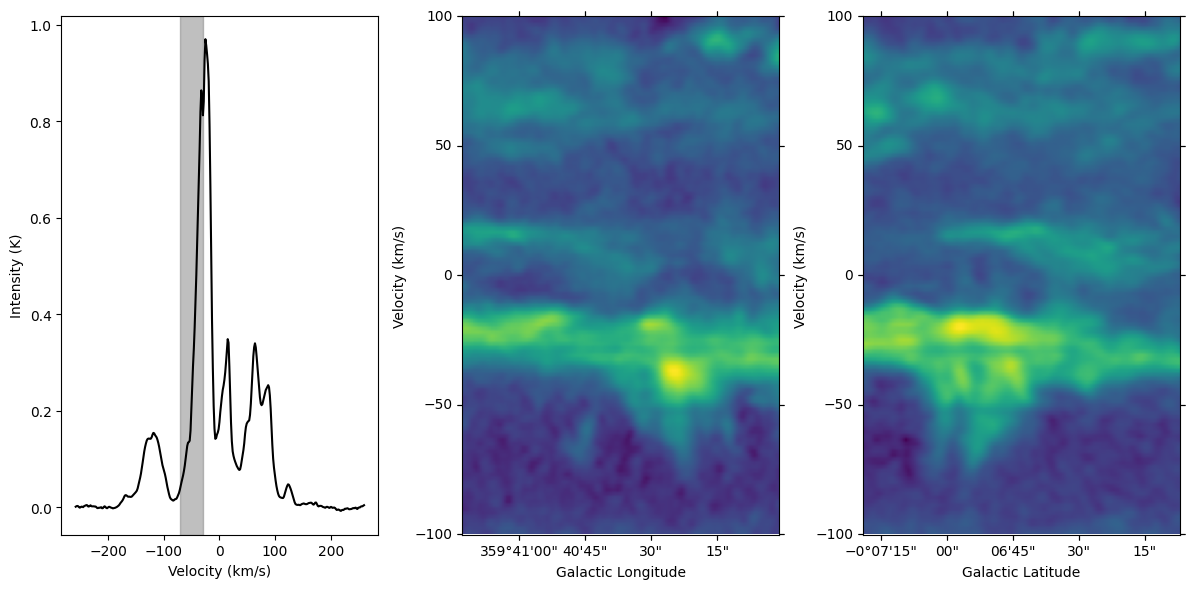

In [5]:
fn = glob(f'{cubepath}/*_10_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-70, -30, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

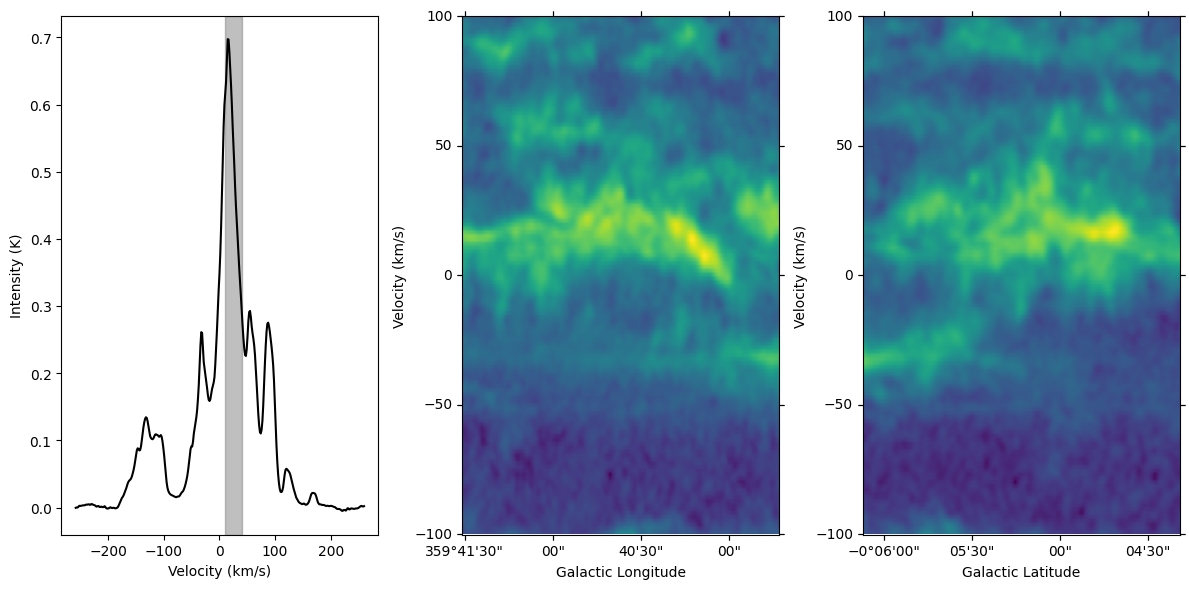

In [7]:
fn = glob(f'{cubepath}/*_11_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(10, 40, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

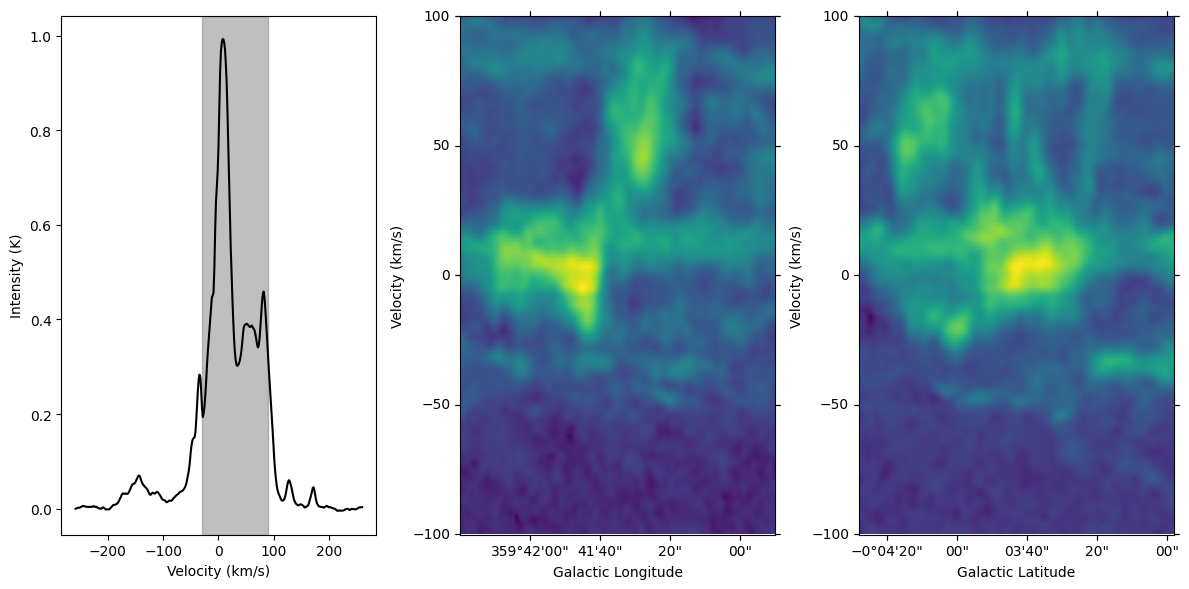

In [8]:
fn = glob(f'{cubepath}/*_14_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-30, 90, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

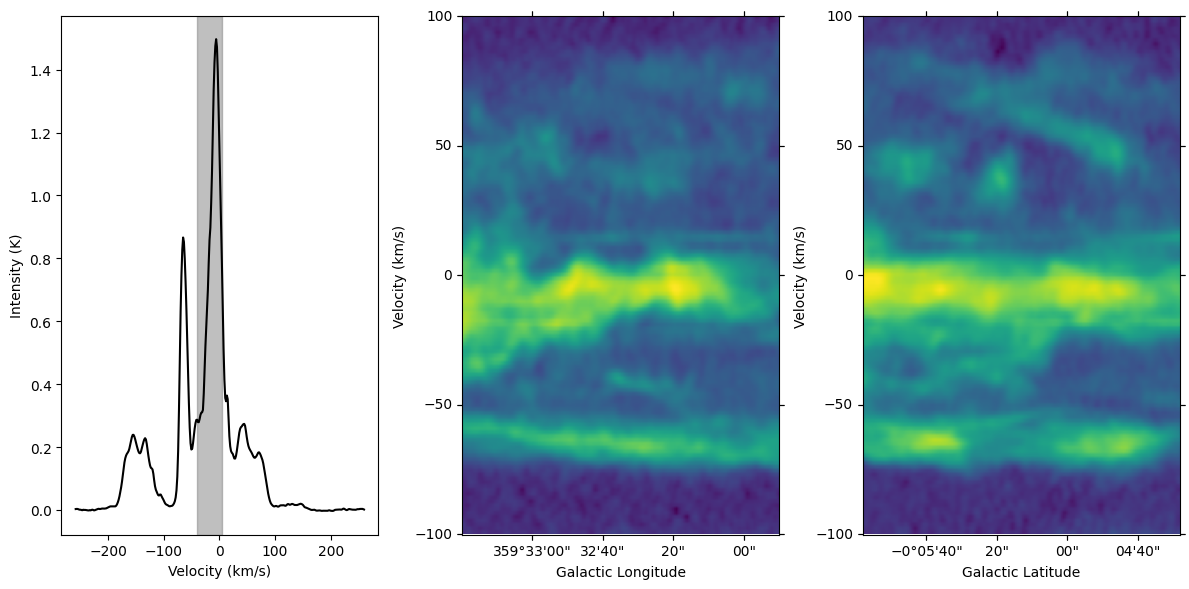

In [9]:
fn = glob(f'{cubepath}/*_15_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-40, 5, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

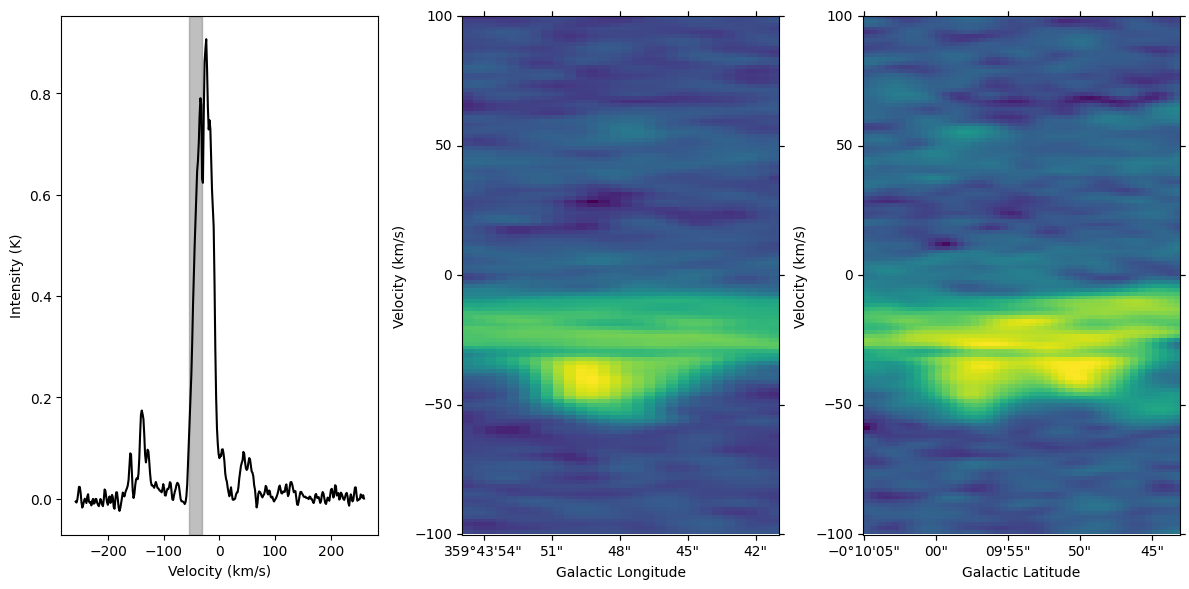

In [10]:
fn = glob(f'{cubepath}/*_25_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-55, -32, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

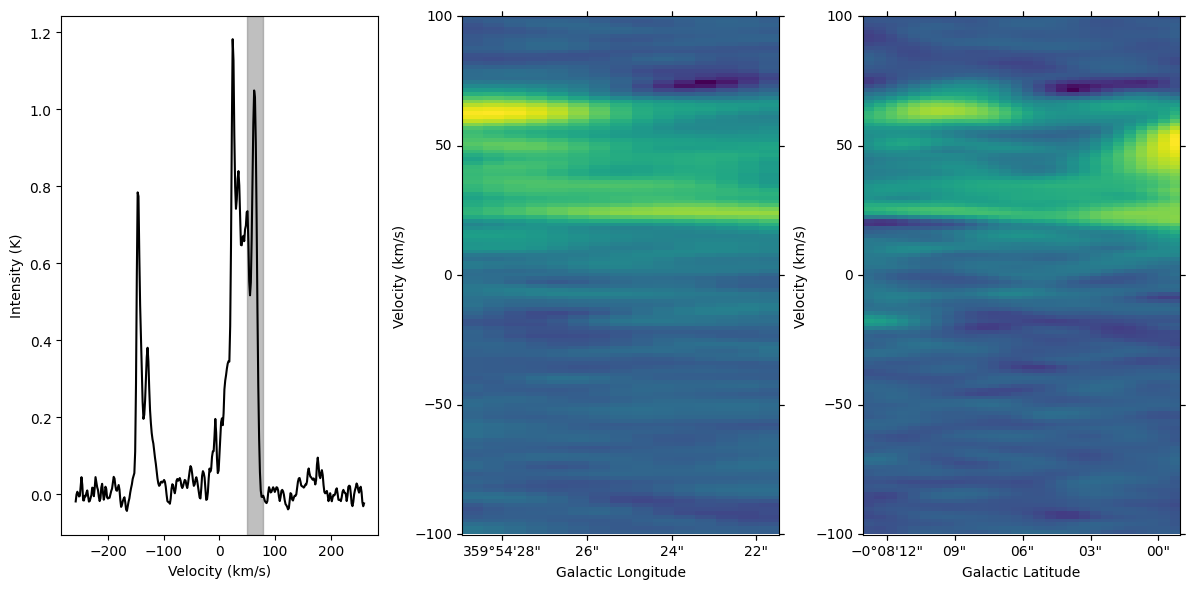

In [12]:
fn = glob(f'{cubepath}/*_28_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(50, 78, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

## Jen's

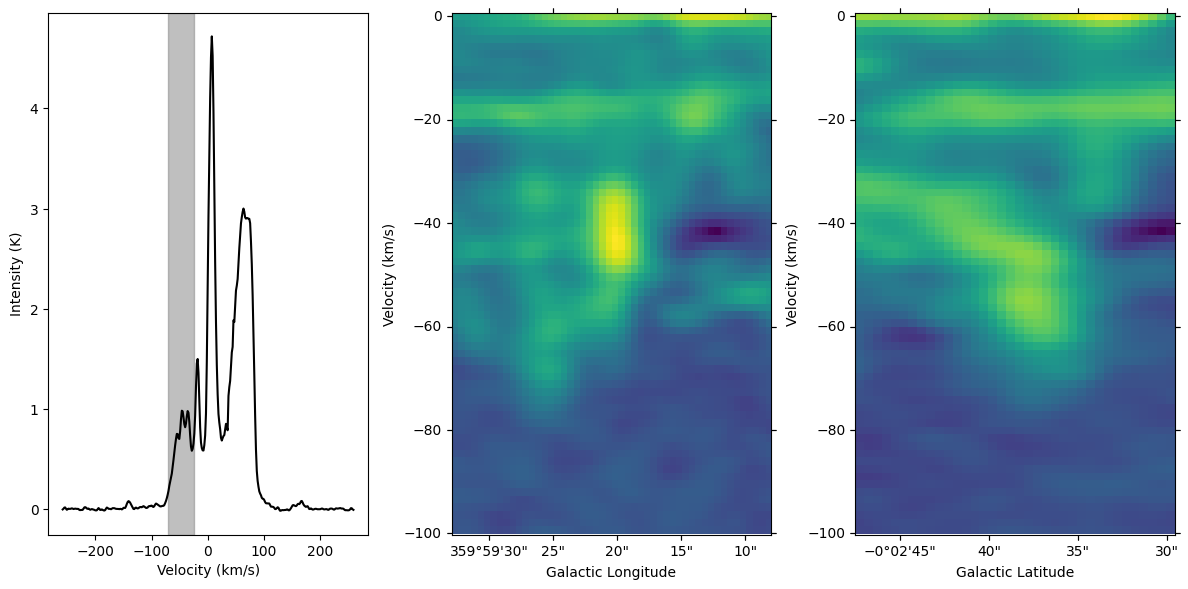

In [14]:
fn = glob(f'{cubepath}/*_66_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 0*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 0*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-71, -25, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

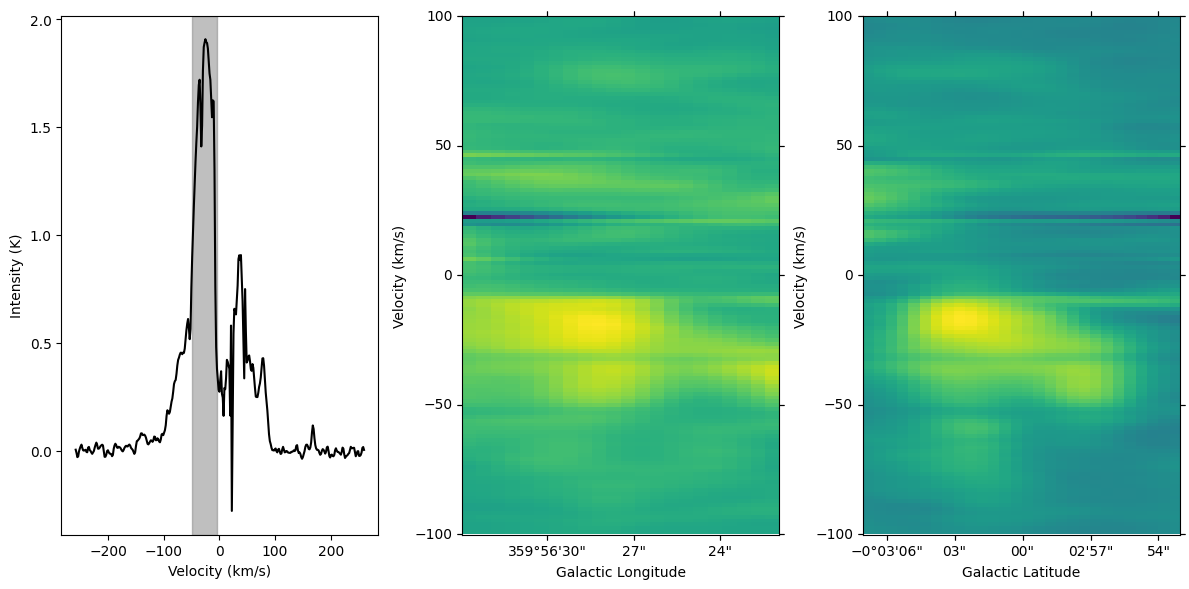

In [17]:
fn = glob(f'{cubepath}/*_71_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-50, -4, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

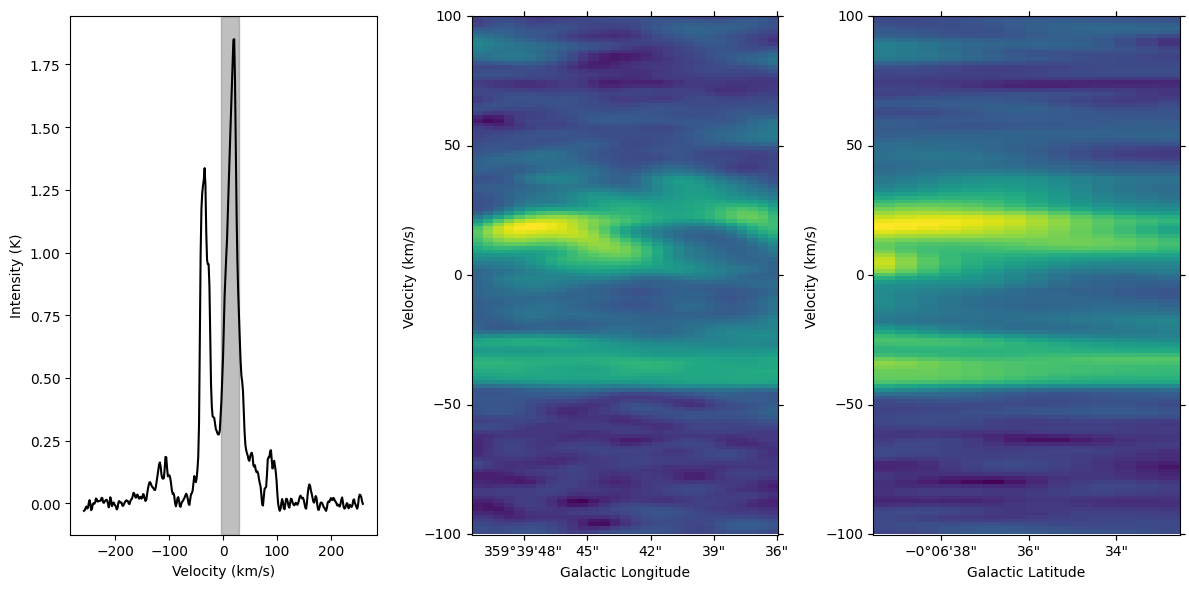

In [19]:
fn = glob(f'{cubepath}/*_75_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-4, 29, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

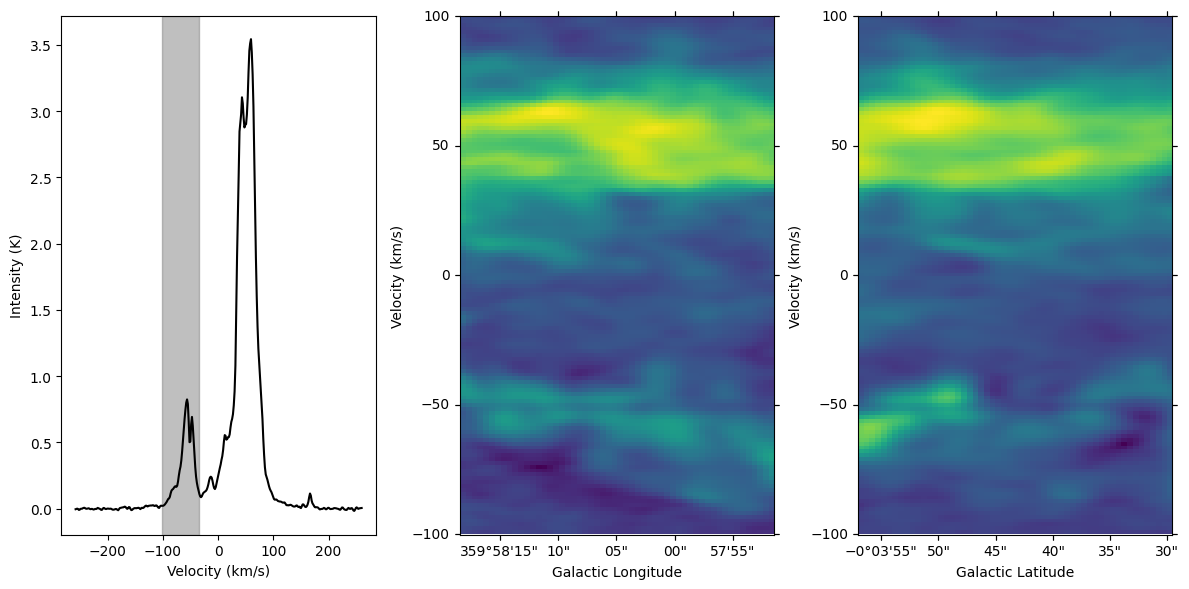

In [20]:
fn = glob(f'{cubepath}/*_76_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-102, -35, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

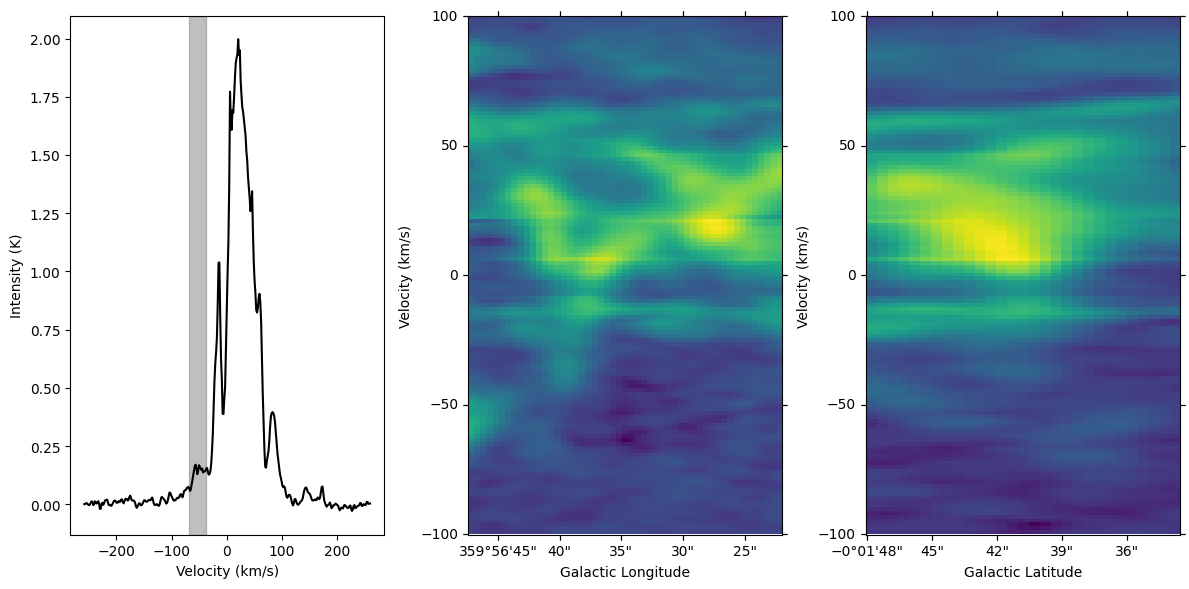

In [23]:
fn = glob(f'{cubepath}/*_79_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-69, -37, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

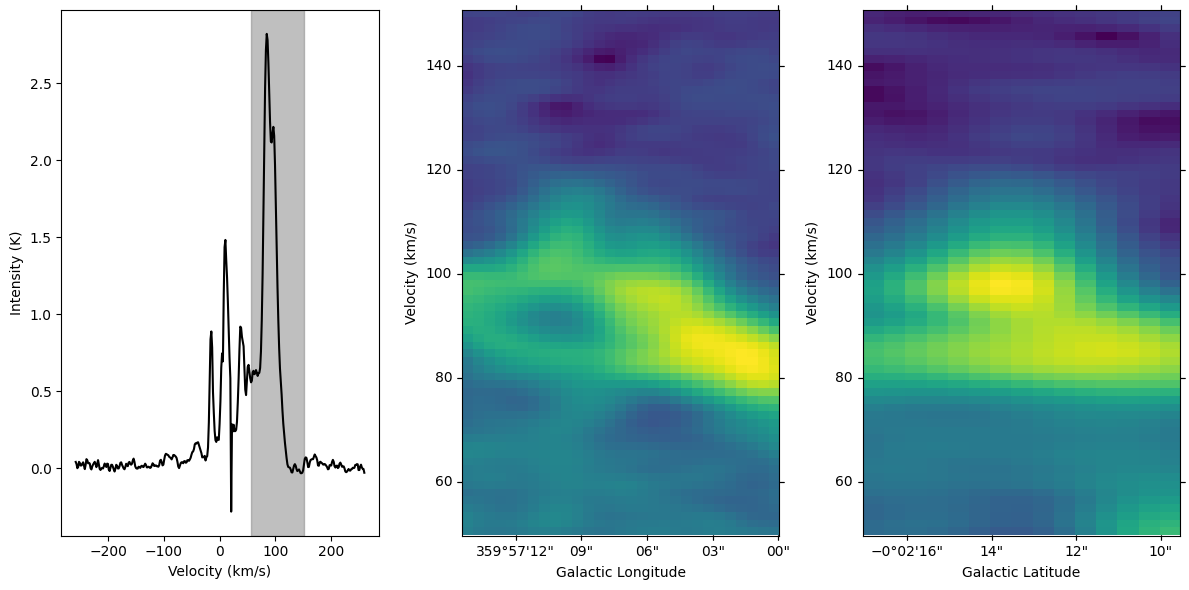

In [25]:
fn = glob(f'{cubepath}/*_80_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(50*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(50*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(56, 151, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

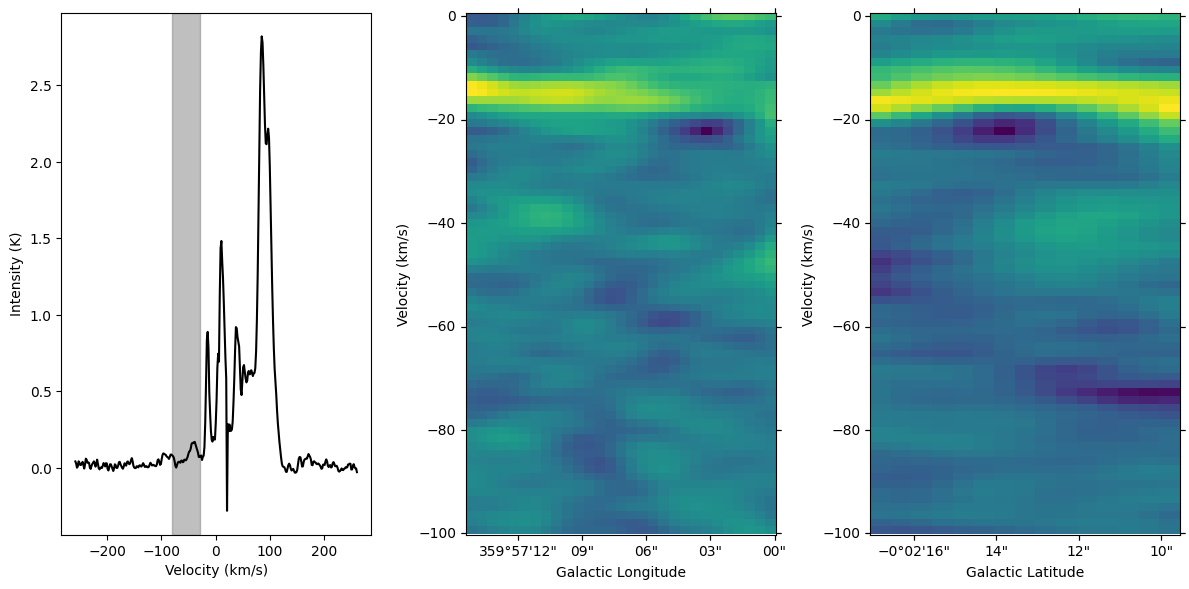

In [ ]:
fn = glob(f'{cubepath}/*_80_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-80, -29, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

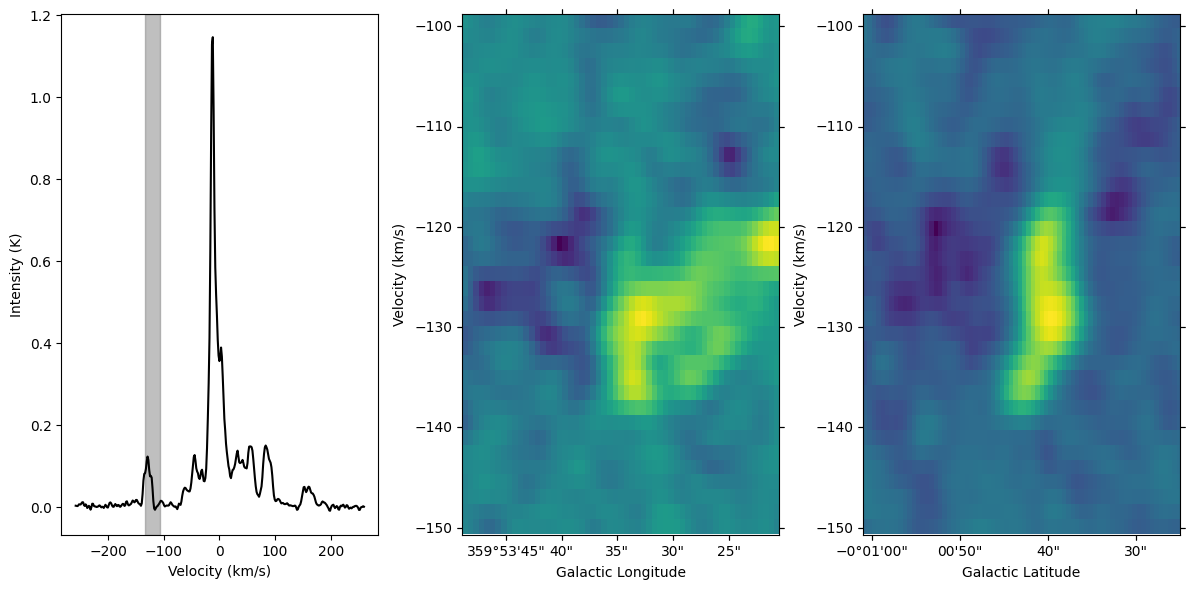

In [29]:
fn = glob(f'{cubepath}/*_83_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-150*u.km/u.s, -100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-150*u.km/u.s, -100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-133, -106, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

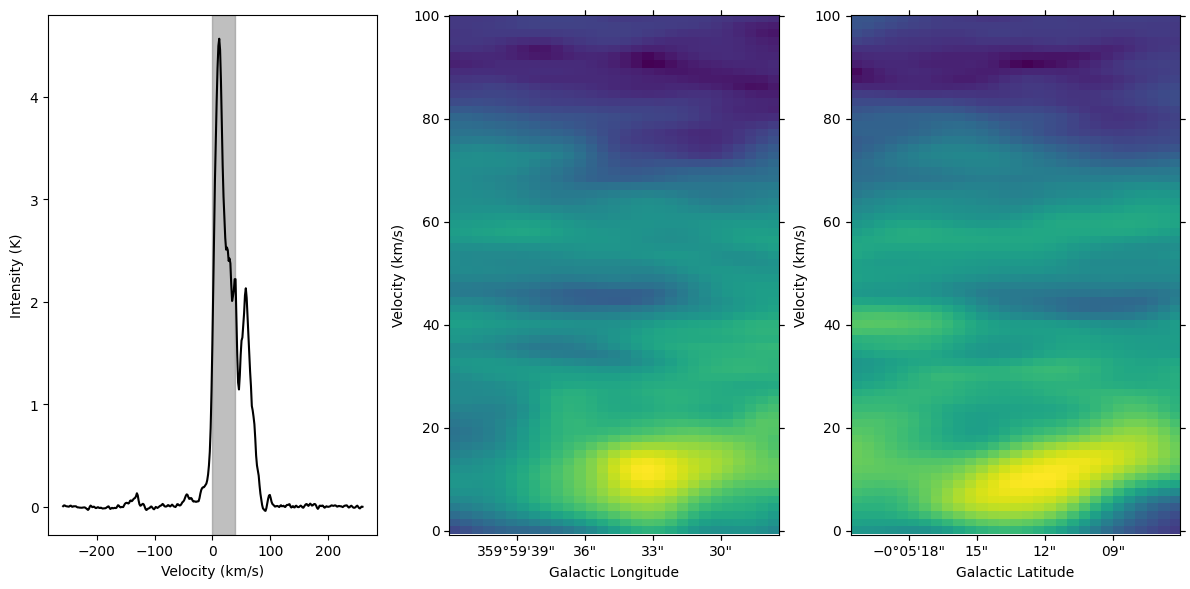

In [32]:
fn = glob(f'{cubepath}/*_84_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-0*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-1, 40, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

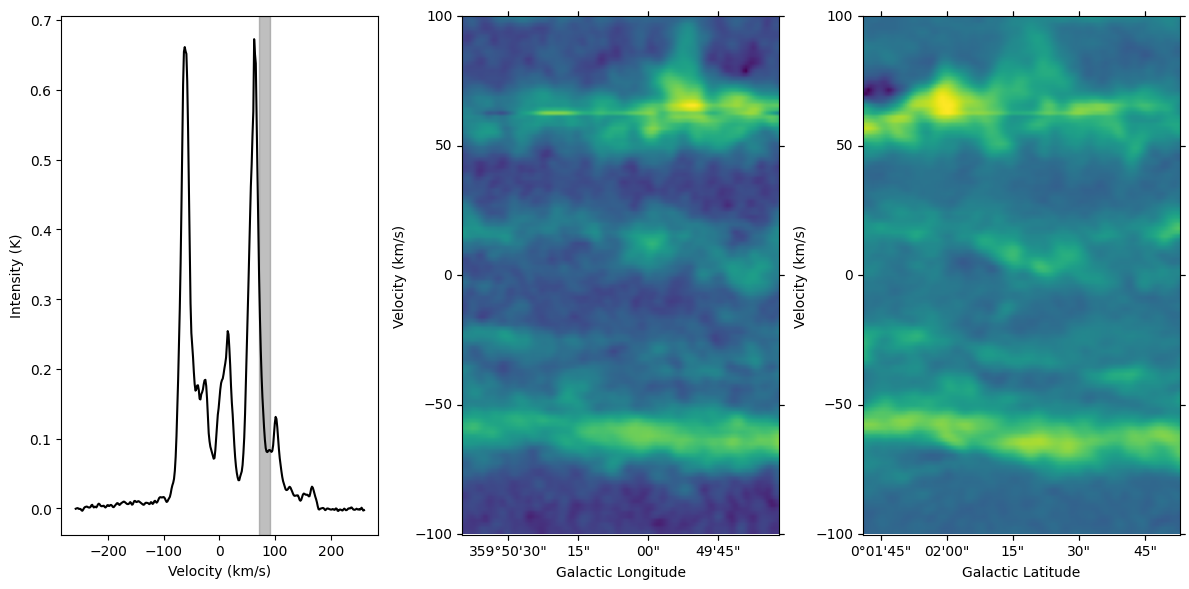

In [33]:
fn = glob(f'{cubepath}/*_86_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(71, 90, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

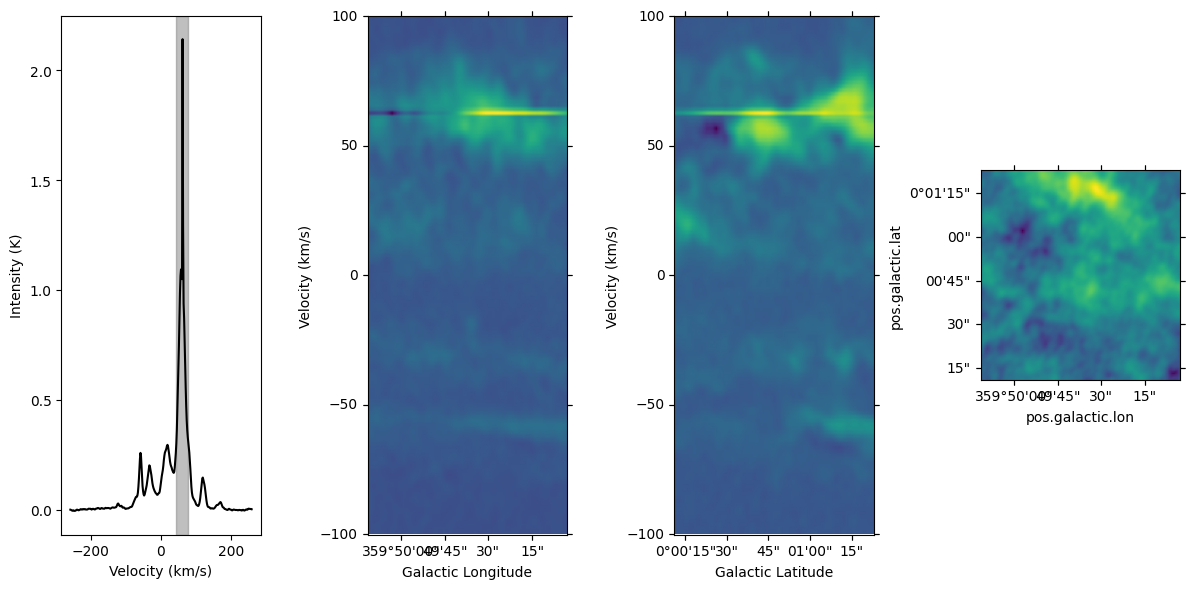

In [35]:
fn = glob(f'{cubepath}/*_87_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)
mom0 = cube.moment0()

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(141)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(43, 77, color='grey', alpha=0.5)

ax2 = plt.subplot(142, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(143, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

ax4 = plt.subplot(144, projection=mom0.wcs)
ax4.imshow(mom0.value, origin='lower', cmap='viridis', norm=simple_norm(mom0.value, 'sqrt'))

plt.tight_layout()

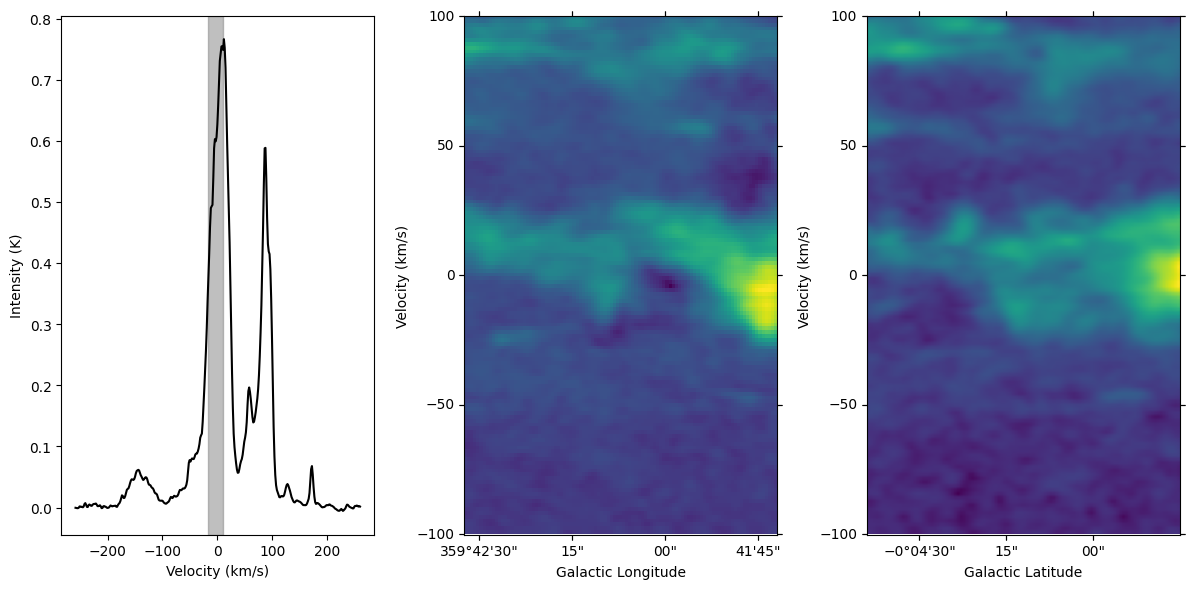

In [37]:
fn = glob(f'{cubepath}/*_88_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(-17, 11, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

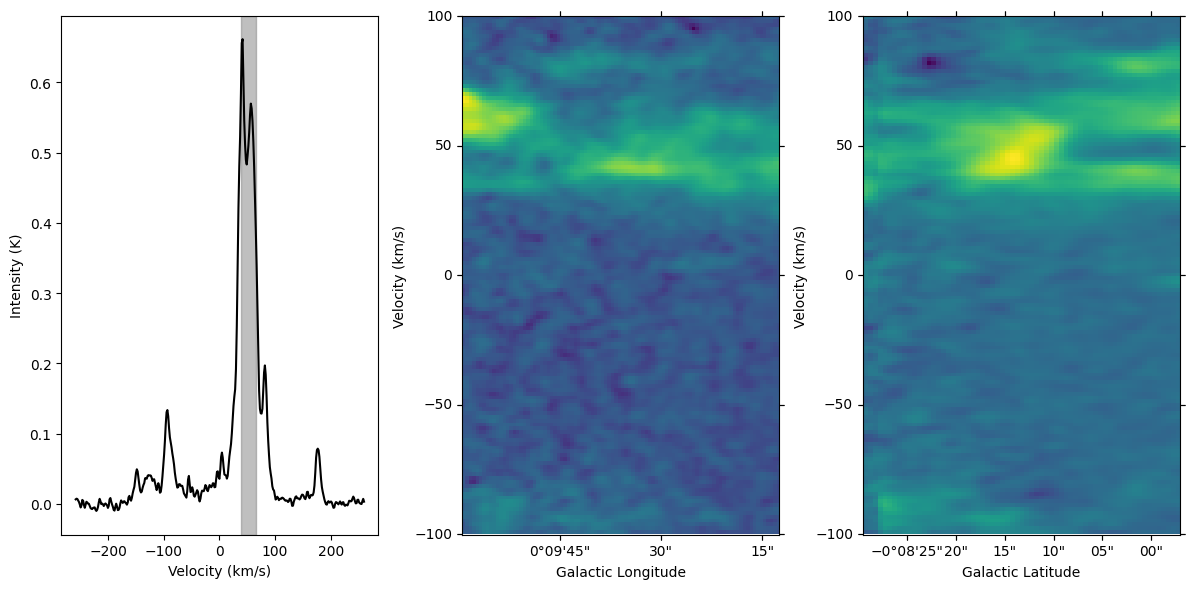

In [38]:
fn = glob(f'{cubepath}/*_94_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

## Pablo's

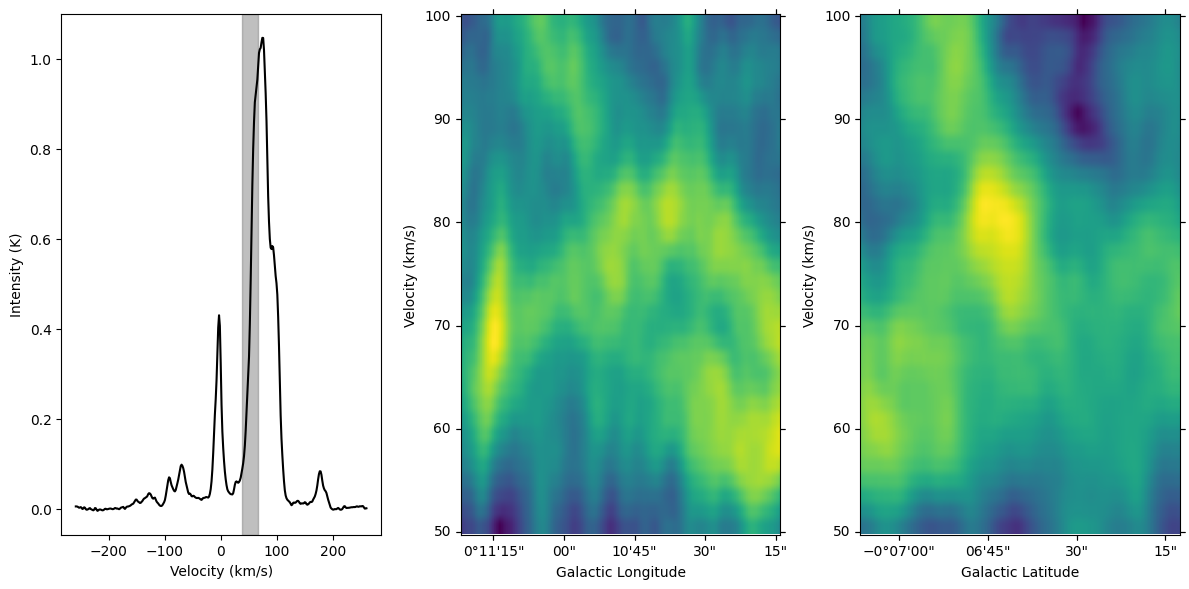

In [36]:
fn = glob(f'{cubepath}/*_95_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(50*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(50*u.km/u.s, 100*u.km/u.s).mean(axis=2)
mom0 = cube.spectral_slab(50*u.km/u.s, 100*u.km/u.s).moment0()

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'sqrt'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'sqrt'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

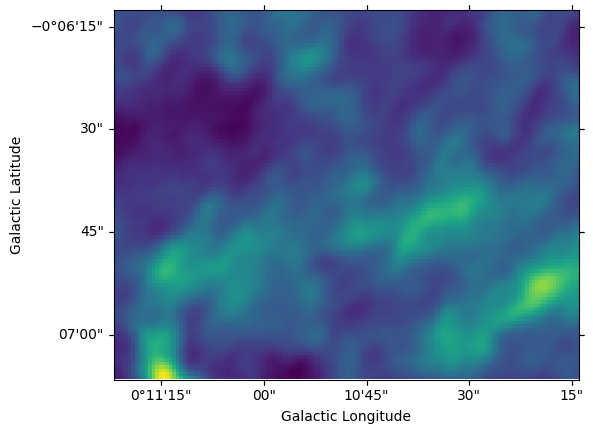

In [38]:
ax = plt.subplot(111, projection=mom0.wcs)
ax.imshow(mom0.value, origin='lower', cmap='viridis')
ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

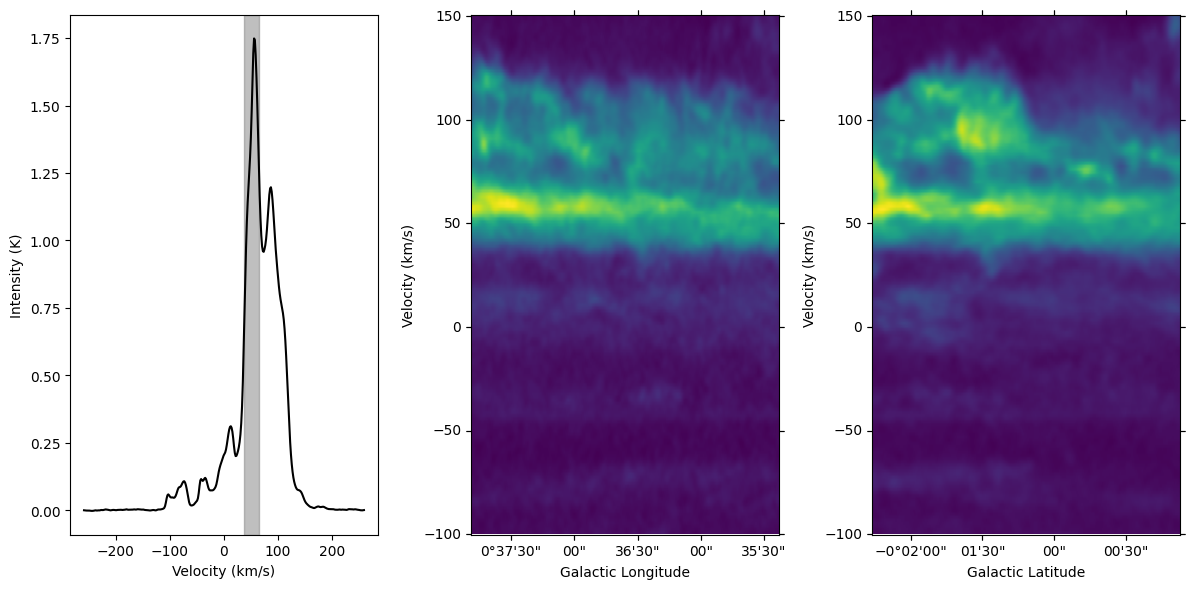

In [11]:
fn = glob(f'{cubepath}/*_110_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

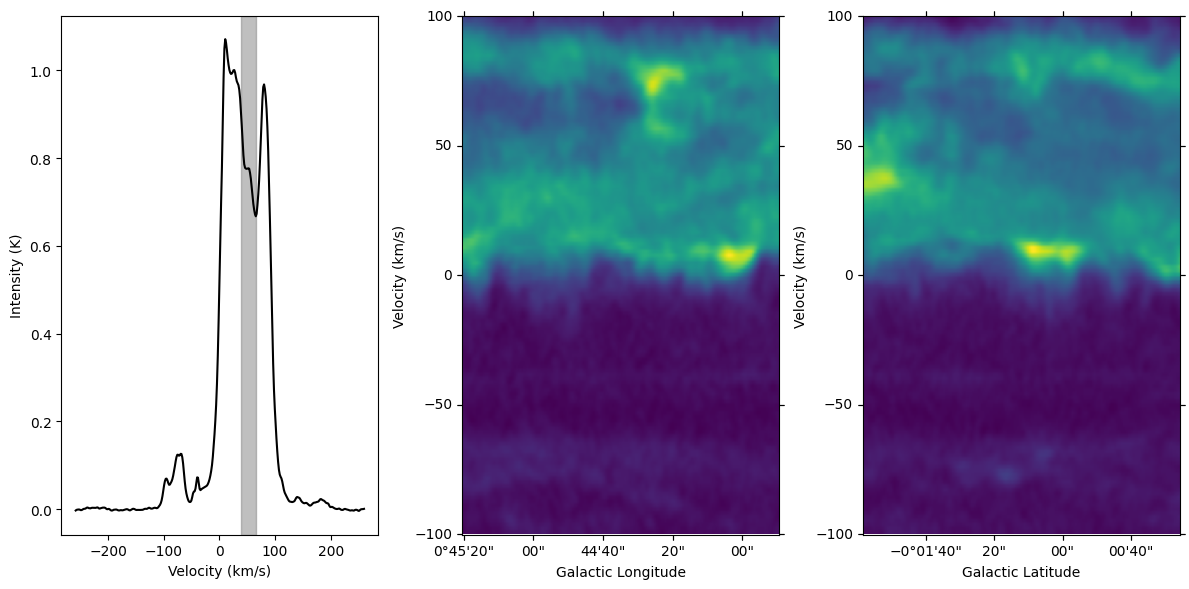

In [12]:
fn = glob(f'{cubepath}/*_111_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

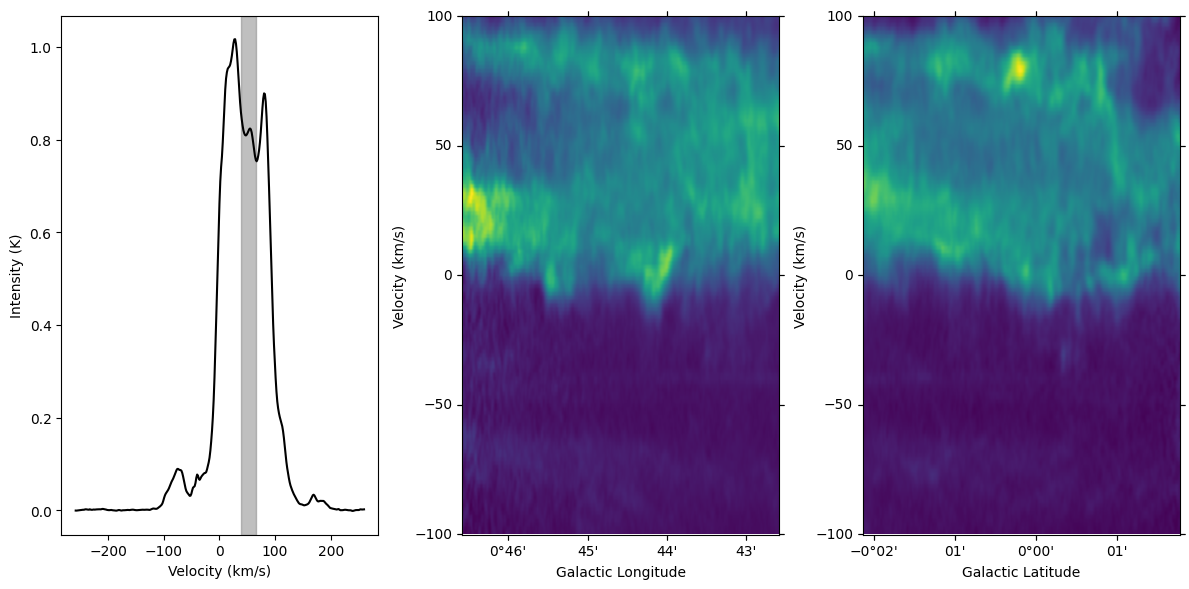

In [13]:
fn = glob(f'{cubepath}/*_112_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

/red/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


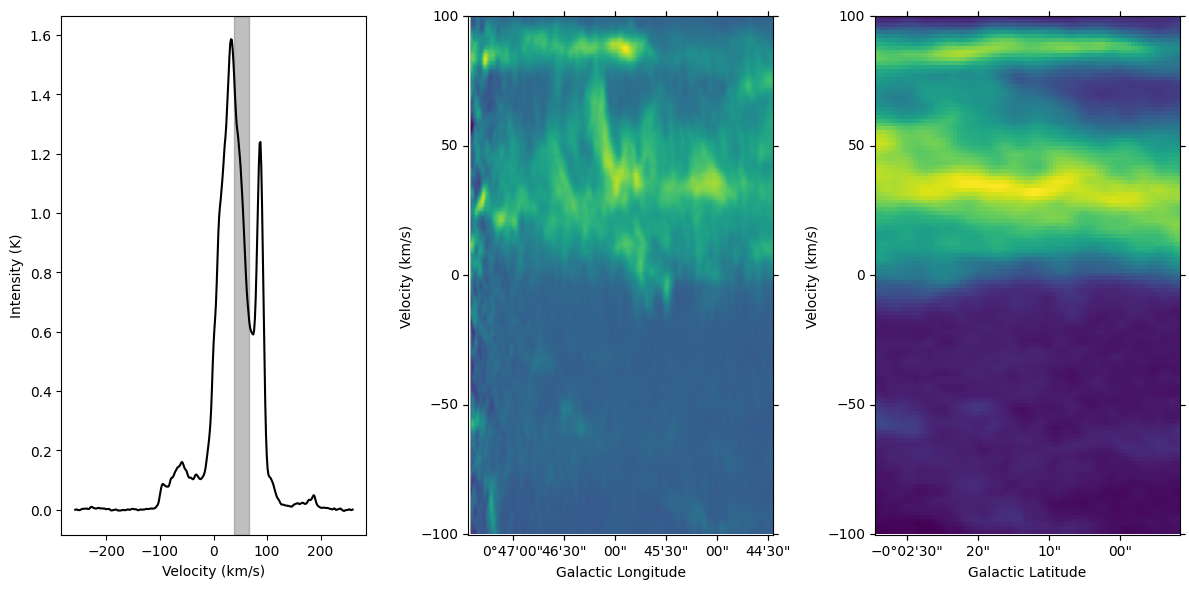

In [14]:
fn = glob(f'{cubepath}/*_113_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 100*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

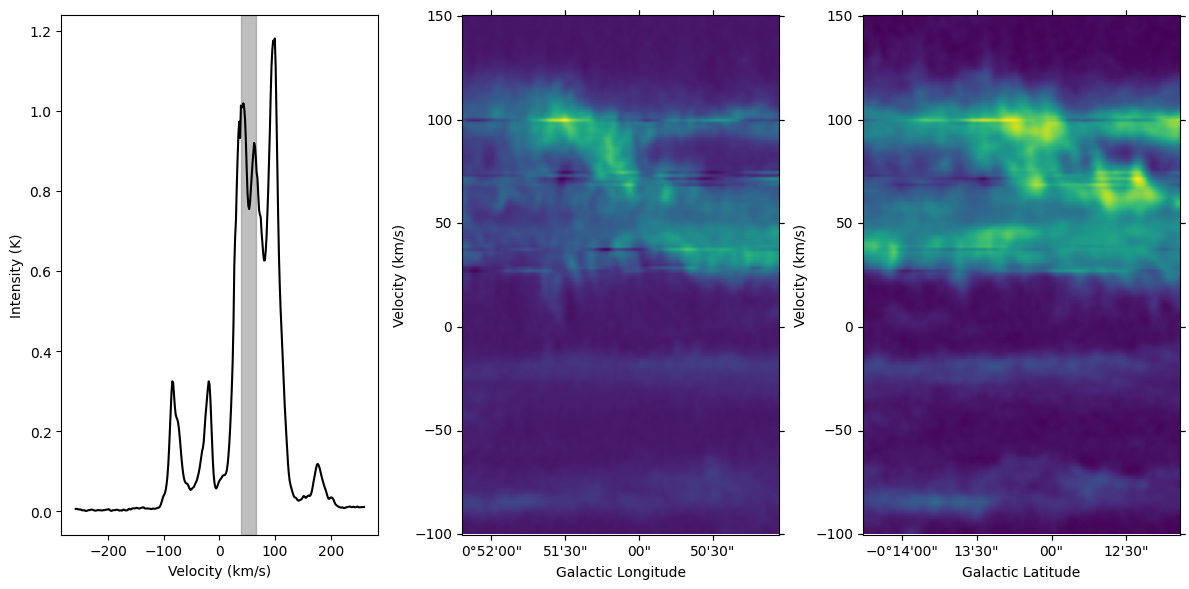

In [15]:
fn = glob(f'{cubepath}/*_115_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

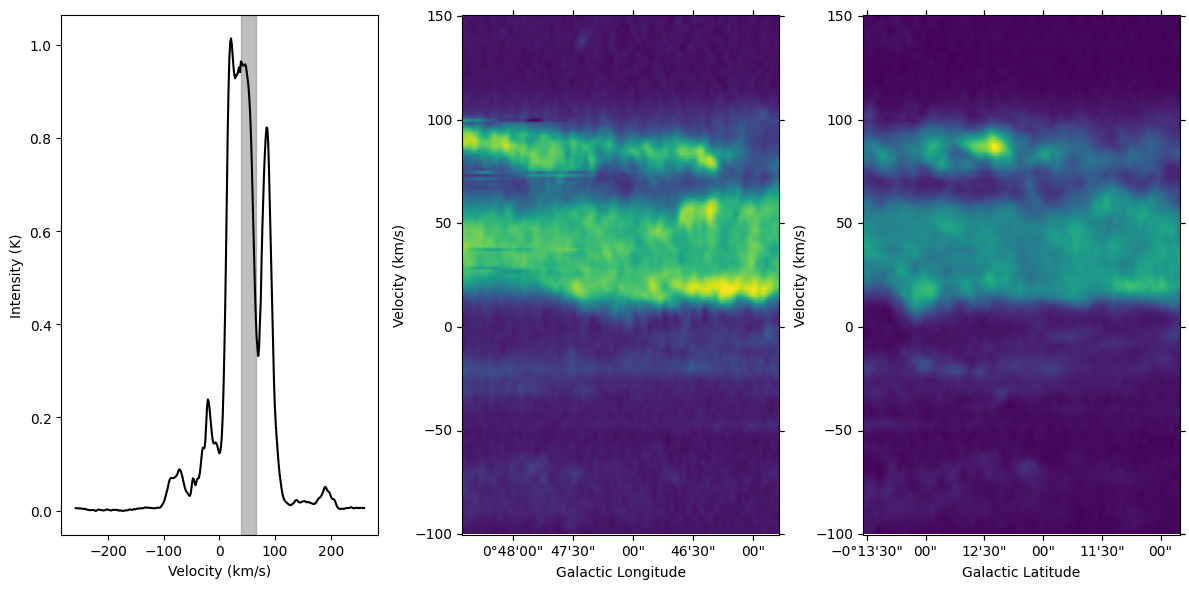

In [16]:
fn = glob(f'{cubepath}/*_123_*')[0]
cube = SpectralCube.read(fn).to(u.K)
spec = cube.mean(axis=(1,2))
pv_l = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=1)
pv_b = cube.spectral_slab(-100*u.km/u.s, 150*u.km/u.s).mean(axis=2)

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(131)
ax1.plot(cube.spectral_axis, spec, color='k')
ax1.set_xlabel('Velocity (km/s)')
ax1.set_ylabel('Intensity (K)')
ax1.axvspan(38, 66, color='grey', alpha=0.5)

ax2 = plt.subplot(132, projection=pv_l.wcs)
ax2.imshow(pv_l.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_l.data, 'linear'))
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Velocity (km/s)')

ax3 = plt.subplot(133, projection=pv_b.wcs)
ax3.imshow(pv_b.data, aspect='auto', origin='lower', cmap='viridis', norm=simple_norm(pv_b.data, 'linear'))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.set_xlabel('Galactic Latitude')
ax3.set_ylabel('Velocity (km/s)')

plt.tight_layout()

# IMBH Candidates

In [42]:
import astropy.constants as const

# V = sqrt (G * M / r)
# V = 50 km/s 
# M = 10**4 Msun
v = 50 * u.km / u.s
m = 10 ** 4 * const.M_sun
r = (const.G * m / v**2).to(u.pc)
r.to(u.AU), r.to(u.pc),

(<Quantity 3548.51146956 AU>, <Quantity 0.01720367 pc>)